# 출처 : [Kaggle 2020] Visualization & Analysis
### https://www.kaggle.com/subinium/kaggle-2020-visualization-analysis/notebook

## Visualization & Analysis

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches #그래프에 다양한 2D 도형을 표현하기 위한 클래스를 포함
import matplotlib.gridspec as gridspec

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings

warnings.filterwarnings(action = 'ignore')
plt.rcParams['figure.dpi'] = 200 #high resolution

In [299]:
data = pd.read_csv(r"./dataset/kaggle_survey_2020_responses.csv")
data

Time from Start to Finish (seconds)                           Q1  \
0                   Duration (in seconds)  What is your age (# years)?   
1                                    1838                        35-39   
2                                  289287                        30-34   
3                                     860                        35-39   
4                                     507                        30-34   
...                                   ...                          ...   
20032                                 126                        18-21   
20033                                 566                        55-59   
20034                                 238                        30-34   
20035                                 625                        22-24   
20036                                1031                        22-24   

                                           Q2  \
0      What is your gender? - Selected Choice   
1                                         Man   
2                                         Man   
3                                         Man   
4                                         Man   
...                                       ...   
20032                                     Man   
20033                                   Woman   
20034                                     Man   
20035                                     Man   
20036                                     Man   

                                                      Q3  \
0              In which country do you currently reside?   
1                                               Colombia   
2                               United States of America   
3                                              Argentina   
4                               United States of America   
...                                                  ...   
20032                                             Turkey   
20033  United Kingdom of Great Britain and Northern I...   
20034                                             Brazil   
20035                                              India   
20036                                           Pakistan   

                                                      Q4  \
0      What is the highest level of formal education ...   
1                                        Doctoral degree   
2                                        Master’s degree   
3                                      Bachelor’s degree   
4                                        Master’s degree   
...                                                  ...   
20032  Some college/university study without earning ...   
20033                                    Master’s degree   
20034                                    Master’s degree   
20035                                  Bachelor’s degree   
20036                                    Master’s degree   

                                                      Q5  \
0      Select the title most similar to your current ...   
1                                                Student   
2                                          Data Engineer   
3                                      Software Engineer   
4                                         Data Scientist   
...                                                  ...   
20032                                                NaN   
20033                             Currently not employed   
20034                                 Research Scientist   
20035                                  Software Engineer   
20036                          Machine Learning Engineer   

                                                      Q6  \
0      For how many years have you been writing code ...   
1                                             5-10 years   
2                                             5-10 years   
3                                            10-20 years   
4                                             5-10 years   
...  

In [300]:
question = data.iloc[0].T
data = data.drop([0])

## Q1 & Q2 Age/Gender Distribution

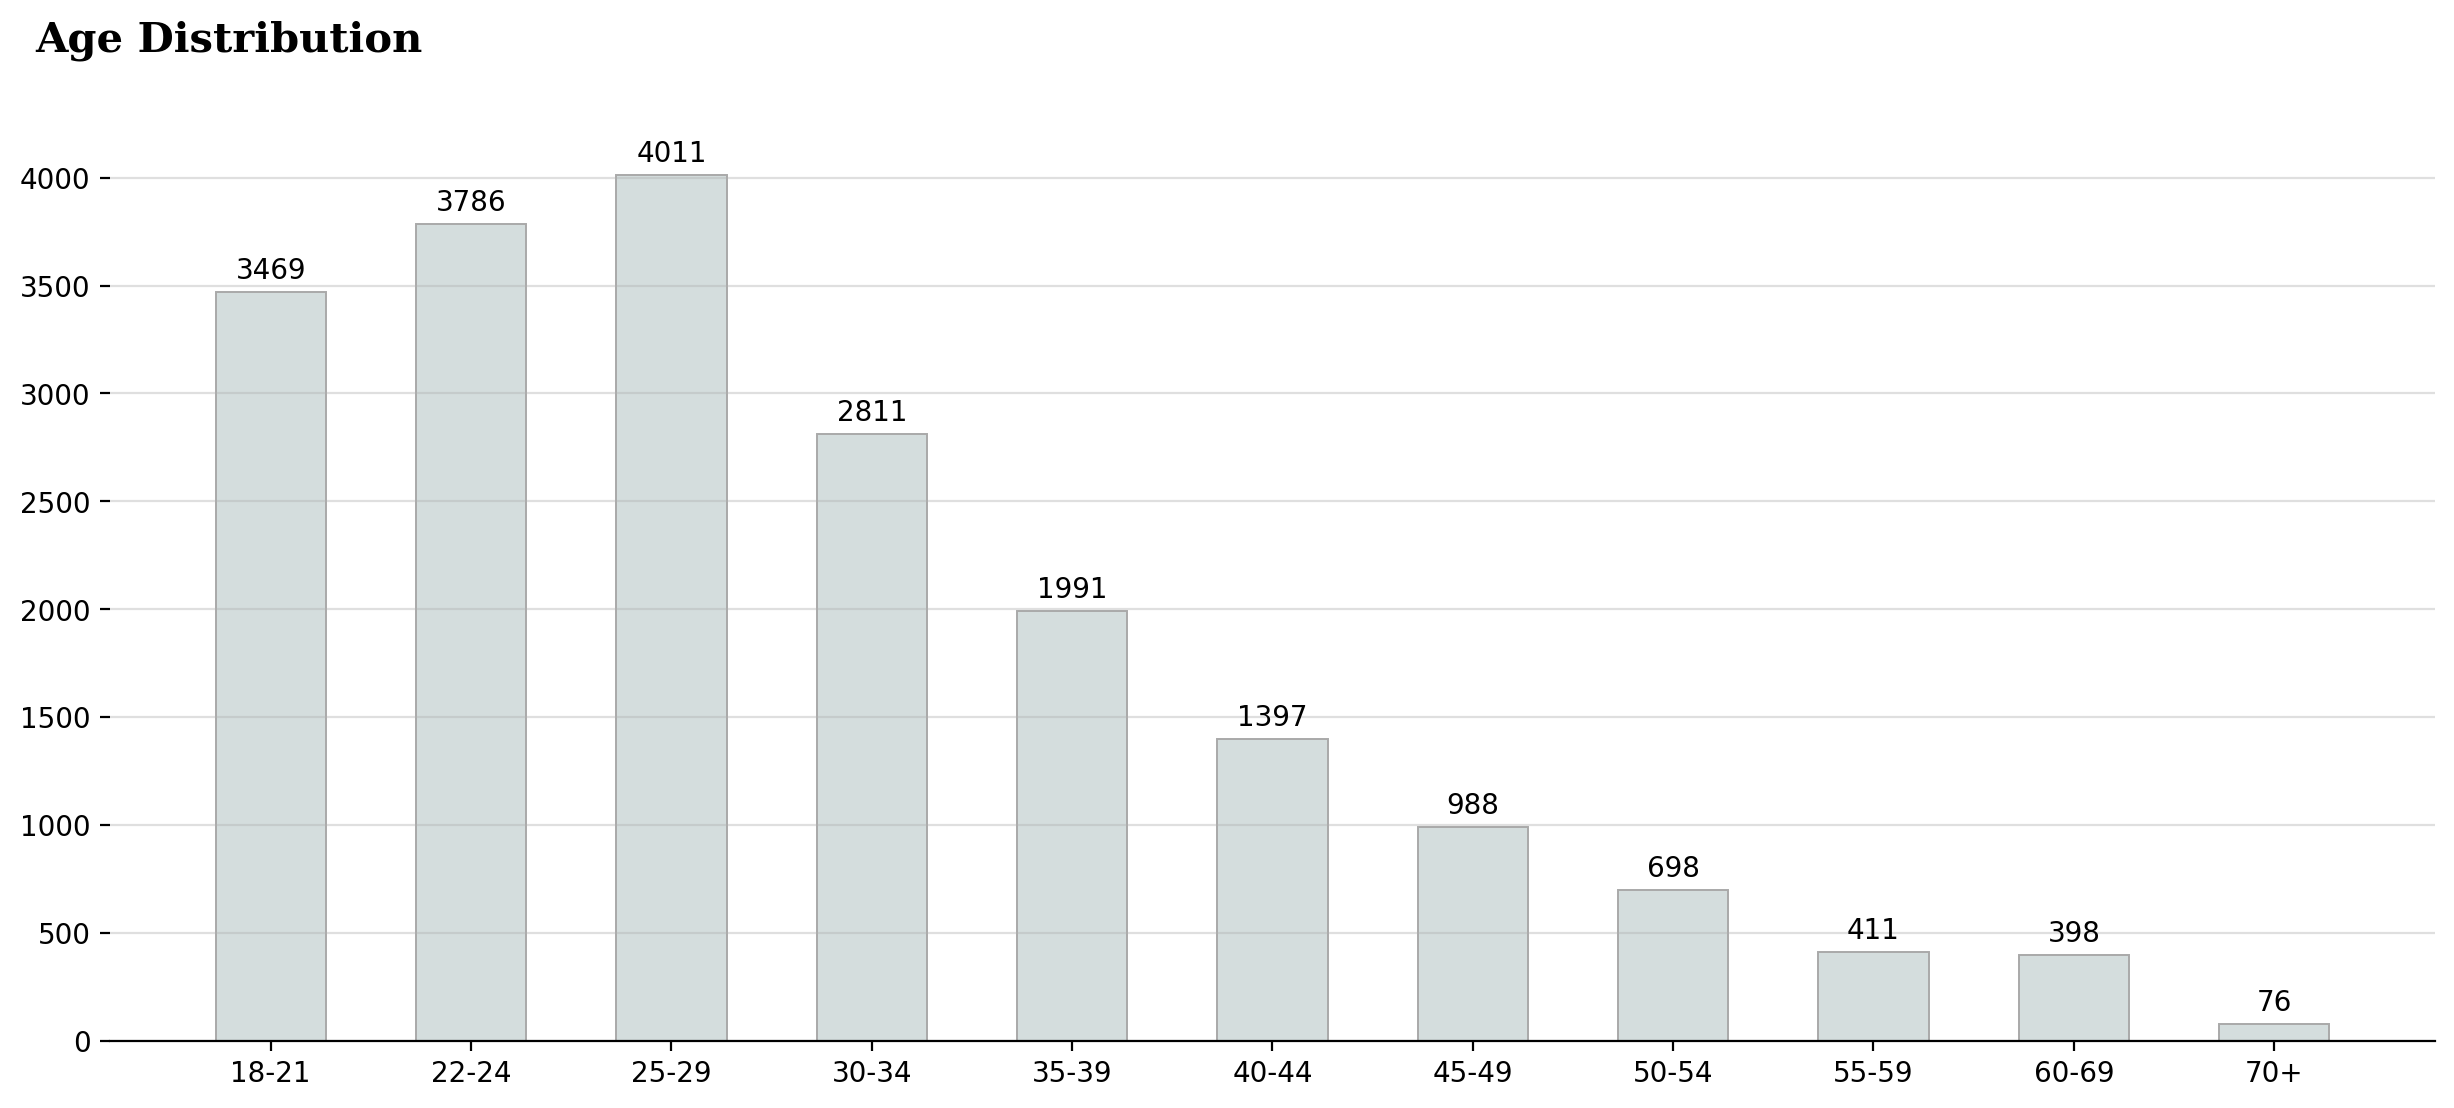

In [301]:
#Q1 analysis
fig, ax = plt.subplots(1,1,figsize = (15,6)) #그래프 개수 및 사이즈 지정
data_q1 = data.Q1.value_counts().sort_index() #Q1의 빈도수를 인덱스 순으로 정렬
ax.bar(data_q1.index, data_q1, width=0.55,
      edgecolor = 'darkgray', color = '#d4dddd',
      linewidth = 0.7)
#bar의 폭, 엣지 색상, 내부 색상, 테두리 두께 지정
for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}",
                xy = (i, data_q1[i]+100),
                va = 'center', ha = 'center', fontweight = 'light',fontfamily = 'Sans Serif')
    #xy : 글자 위치
    #va & ha : value 위치 
    #fontweight : 글자 굵기
    #fontfamily : 글꼴
    
for s in ['top','left','right']:
    ax.spines[s].set_visible(False) #그래프 테두리 속성
    
ax.set_ylim(0, 4200) #y축 축 범위 지정
ax.set_xticklabels(data_q1.index, fontfamily = 'Sans Serif') #x축 텍스트 변경
ax.set_yticklabels(np.arange(0,4001,500),fontfamily = 'Sans Serif') #y축 텍스트 변경
fig.text(0.1, 0.95, 'Age Distribution', fontsize = 15, fontweight = "bold", fontfamily = 'serif')#제목 지정
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
plt.show()



[]

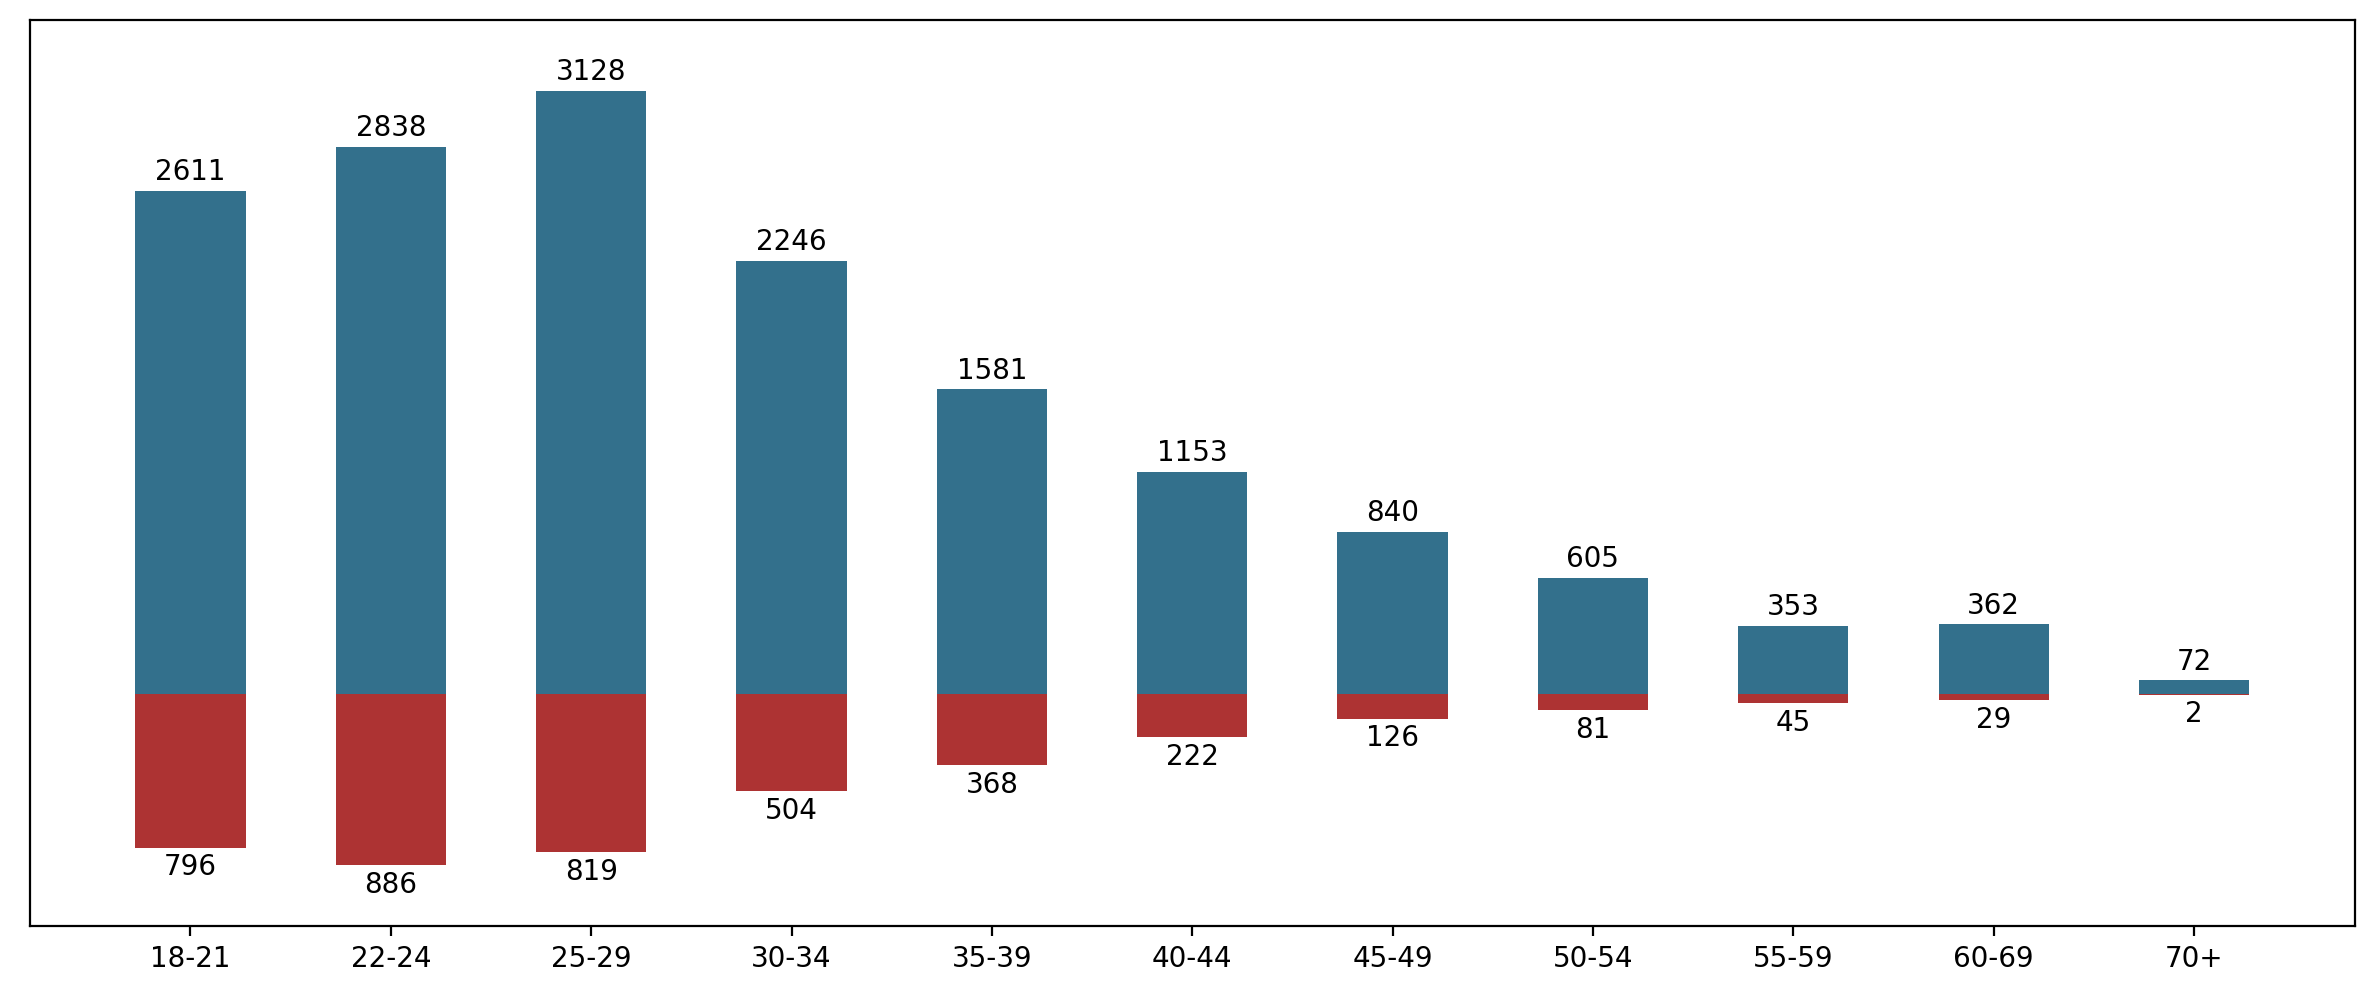

In [302]:
#Q2 analysis
data['Q2'] = data.Q2.apply(lambda x : 'etc' if x not in ['Man','Woman'] else x)
#Q2값에서 남성 혹은 여성이 아닌 경우 etc로 문자 변경
data_q1q2 = data[data.Q2 != 'etc'].groupby("Q2")["Q1"].value_counts().unstack().sort_index()
#Q2 !='etc'인 data에서 Q2로 Q1을 묶고, 정렬
man = data_q1q2.loc['Man']
woman = data_q1q2.loc['Woman']

#그래프 그리기 - 남자
fig, ax = plt.subplots(1,1, figsize = (15,6))
ax.bar(x = man.index,
       height = man,
       width = 0.55,
       color = '#004c70',
       alpha = 0.8,
       label = 'Male')
#그래프 그리기 - 여자
ax.bar(x = woman.index,
       height = -woman,
       width = 0.55,
       color = '#990000',
       alpha = 0.8,
       label = 'Female')
#y축 범위 지정
ax.set_ylim(-1200,3500)

#남성 데이터 빈도수 텍스트 입력
for i in man.index:
    ax.annotate(s = f"{man[i]}",
               xy = (i, man[i] + 100),
               va = 'center', ha = 'center', fontweight = 'light', fontfamily = 'Sans Serif',
               color = '#000000')
    
#여성 데이터 빈도수 입력
for i in woman.index:
    ax.annotate(s = f"{woman[i]}",
               xy = (i, - woman[i] - 100),
               va = 'center', ha = 'center', fontweight = 'light',fontfamily = 'Sans Serif',
               color = '#000000')
    
ax.set_xticklabels(data_q1q2.columns, fontfamily = "Sans Serif")
ax.set_yticks([])

## Q2 & Q3. Gender & Country

In [303]:
q3_order = data.Q3.value_counts()[:11].drop("Other").index
#Q3의 빈도수를 확인후 Top10 이후는 삭제

data_q2q3 = data.groupby("Q3")["Q2"].value_counts().unstack()
data_q2q3 = data_q2q3.loc[q3_order]
data_q2q3['sum'] = data_q2q3.sum(axis = 1)
# apply 함수로도 가능 data_q2q3.apply(func = np.sum, axis = 1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[["Man","Woman","etc"]]
data_q2q3_ratio = data_q2q3_ratio.rename(index = {'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})[::-1]
data_q2q3_ratio


Q2            Man     Woman       etc
Turkey   0.723837  0.252907  0.023256
Germany  0.806931  0.163366  0.029703
China    0.818565  0.145570  0.035865
Nigeria  0.823529  0.170168  0.006303
UK       0.789366  0.186094  0.024540
Russia   0.843643  0.137457  0.018900
Japan    0.924765  0.065831  0.009404
Brazil   0.863112  0.134006  0.002882
USA      0.751006  0.215914  0.033080
India    0.767561  0.220304  0.012135

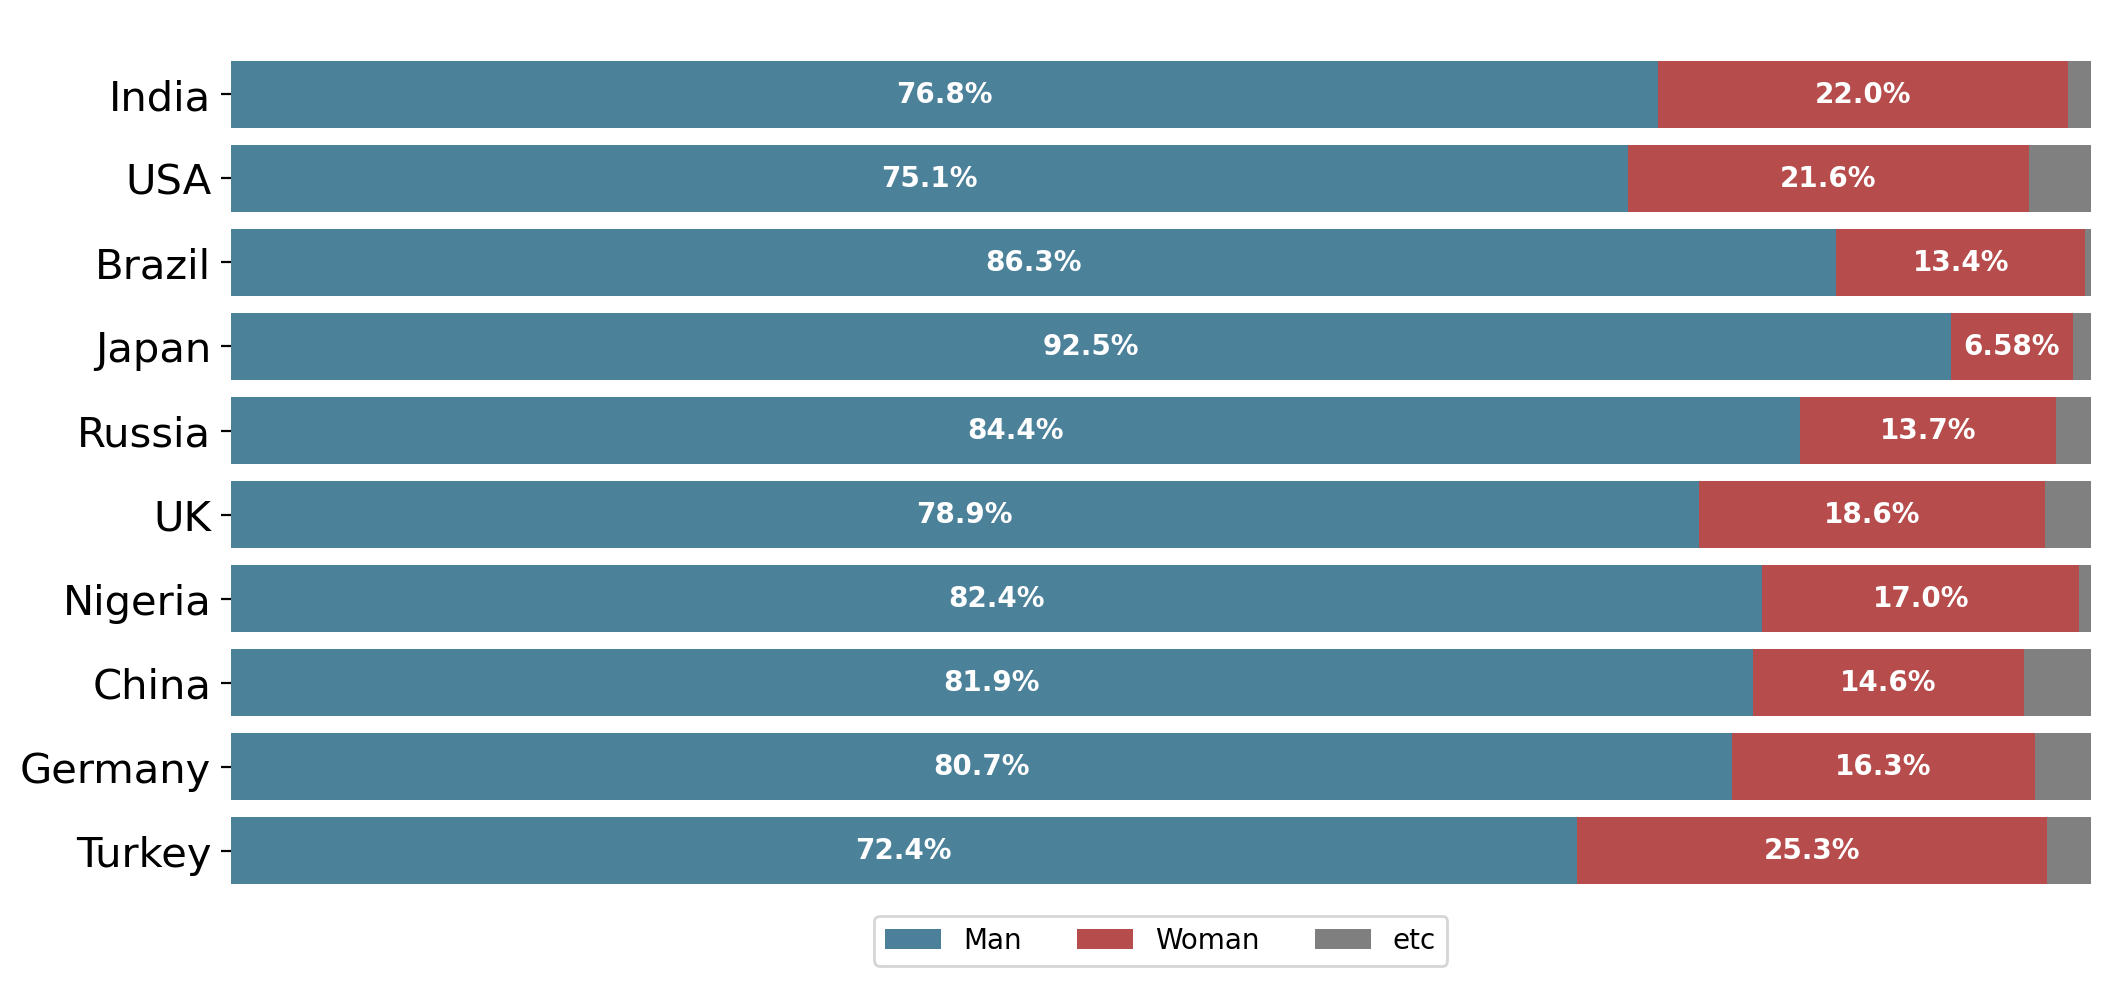

In [304]:
fig,ax = plt.subplots(1,1, figsize = (12,6))


ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'],
       color = "#004c70",alpha = 0.7, label = "Man")
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'],
       color = "#990000", alpha = 0.7, label = "Woman",
        left = data_q2q3_ratio["Man"])
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['etc'],
       color = "#4a4a4a", alpha = 0.7, label = "etc",
        left = data_q2q3_ratio["Man"]+data_q2q3_ratio["Woman"])

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily = "Sans Serif", fontsize = 15)

#male & female Percentage
for i in data_q2q3_ratio.index:
    ax.annotate(s = f"{data_q2q3_ratio.Man[i]*100:.3}%",
                xy = (data_q2q3_ratio.Man[i]/2,i),
                va = "center", ha = "center", fontsize = 10, fontweight = 'bold', fontfamily = 'Sans Serif',
                color = 'white')
    #문자열로 반올림 사용 방법 2가지
    ##1 f"{round(값)}" or f"{값 : .3} <= 3자리 보이기"
    
for i in data_q2q3_ratio.index:
    ax.annotate(s = f"{data_q2q3_ratio.Woman[i]*100:.3}%",
                xy = (data_q2q3_ratio.Man[i]+data_q2q3_ratio.Woman[i]/2,i),
                va = "center", ha = "center", fontweight = "bold", fontsize = 10, fontfamily = "Sans Serif",
                color = 'white')
    
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc = 'lower center', ncol = 3, bbox_to_anchor = (0.5, -0.06))
plt.show()

## Q4 & Q6 Degree / Experience

In [305]:
q4_cols=['No formal education past high school',
'Some college/university study without earning a bachelor’s degree', 
'Bachelor’s degree','Master’s degree','Doctoral degree','Professional degree','I prefer not to answer']

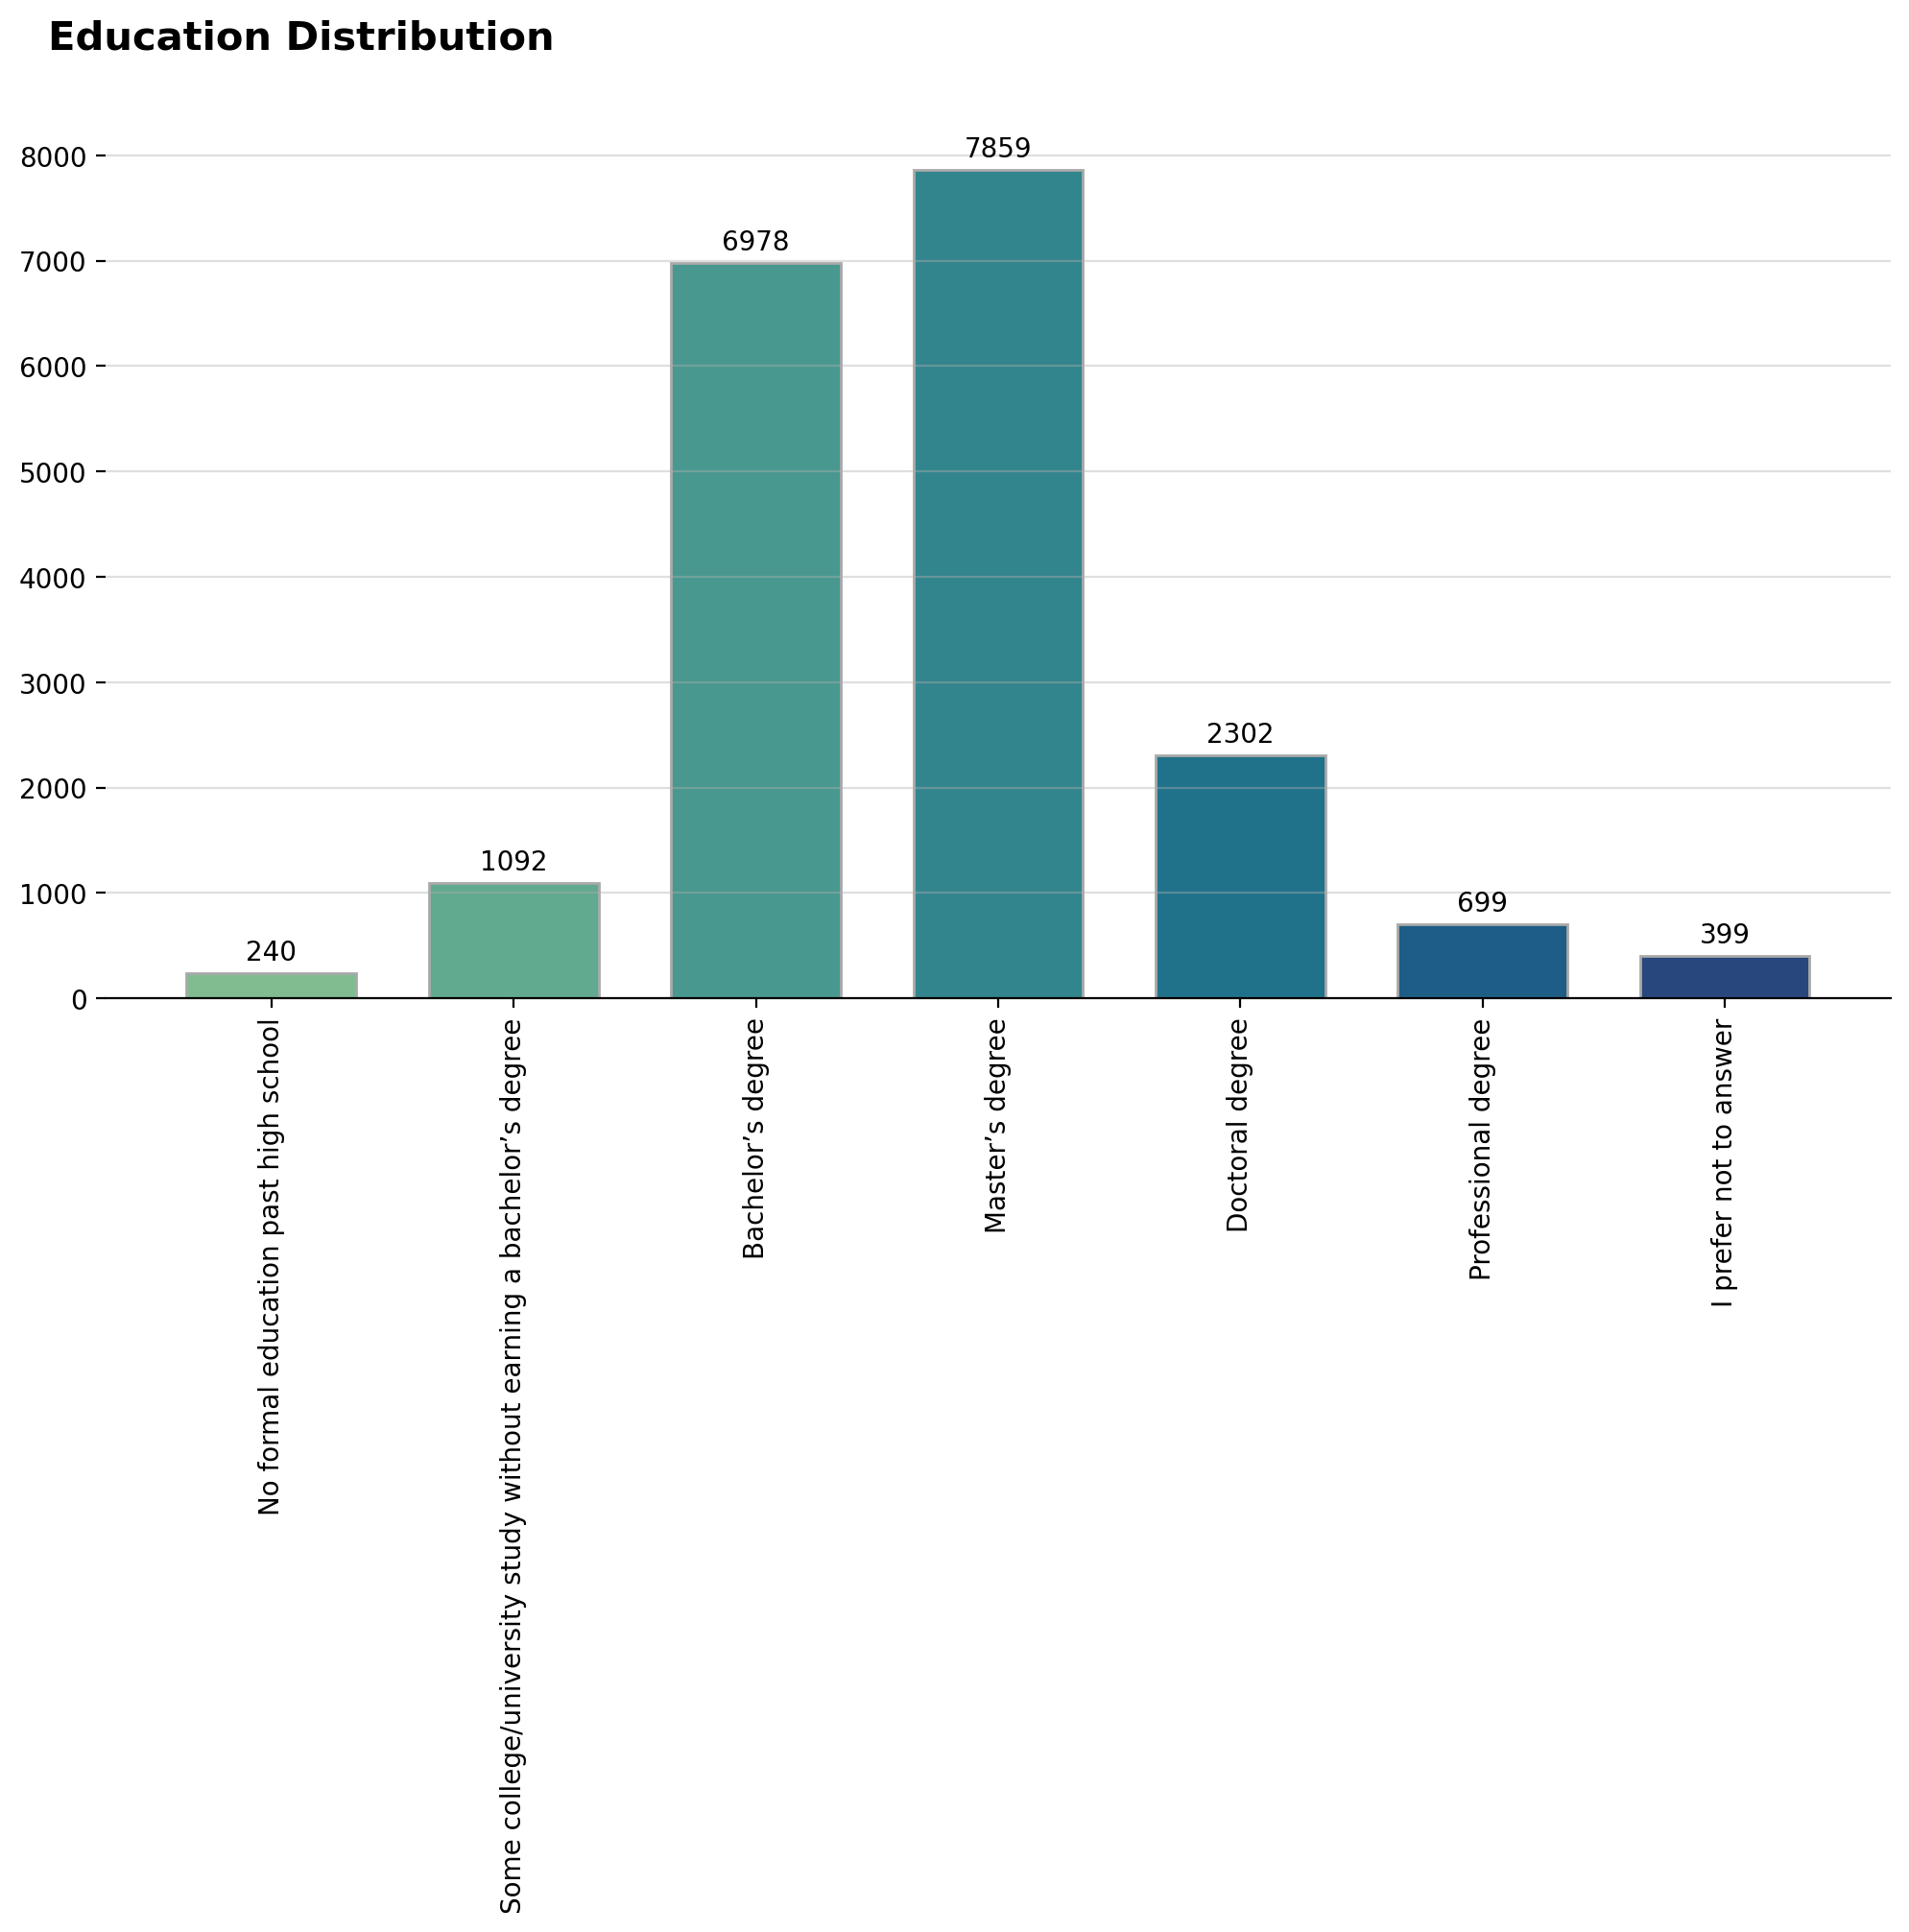

In [306]:
data_q4 = data.Q4.value_counts()[q4_cols]

fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,6))

ax.bar(data_q4.index,data_q4, width = 0.7, edgecolor = 'darkgray',
       color = sns.color_palette(palette = 'crest', n_colors = 7))

for i in data_q4.index:
    ax.annotate(s = f"{data_q4[i]}",
                xy = (i, data_q4[i]+200),
                va = 'center', ha = 'center', fontweight = 'light', fontfamily = "Sans Serif")
    
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q4.index, fontfamily = 'Sans Serif', rotation = 90)
fig.text(0.1, 0.95, 'Education Distribution', fontfamily = 'Sans Serif', fontsize = 15, fontweight = 'bold')
ax.grid(axis = 'y', alpha = 0.4, ls = '-')
plt.show()

In [307]:
data.Q6.unique()
q6_cols = ['I have never written code','< 1 years', '1-2 years',
           '3-5 years', '5-10 years', '10-20 years', '20+ years']

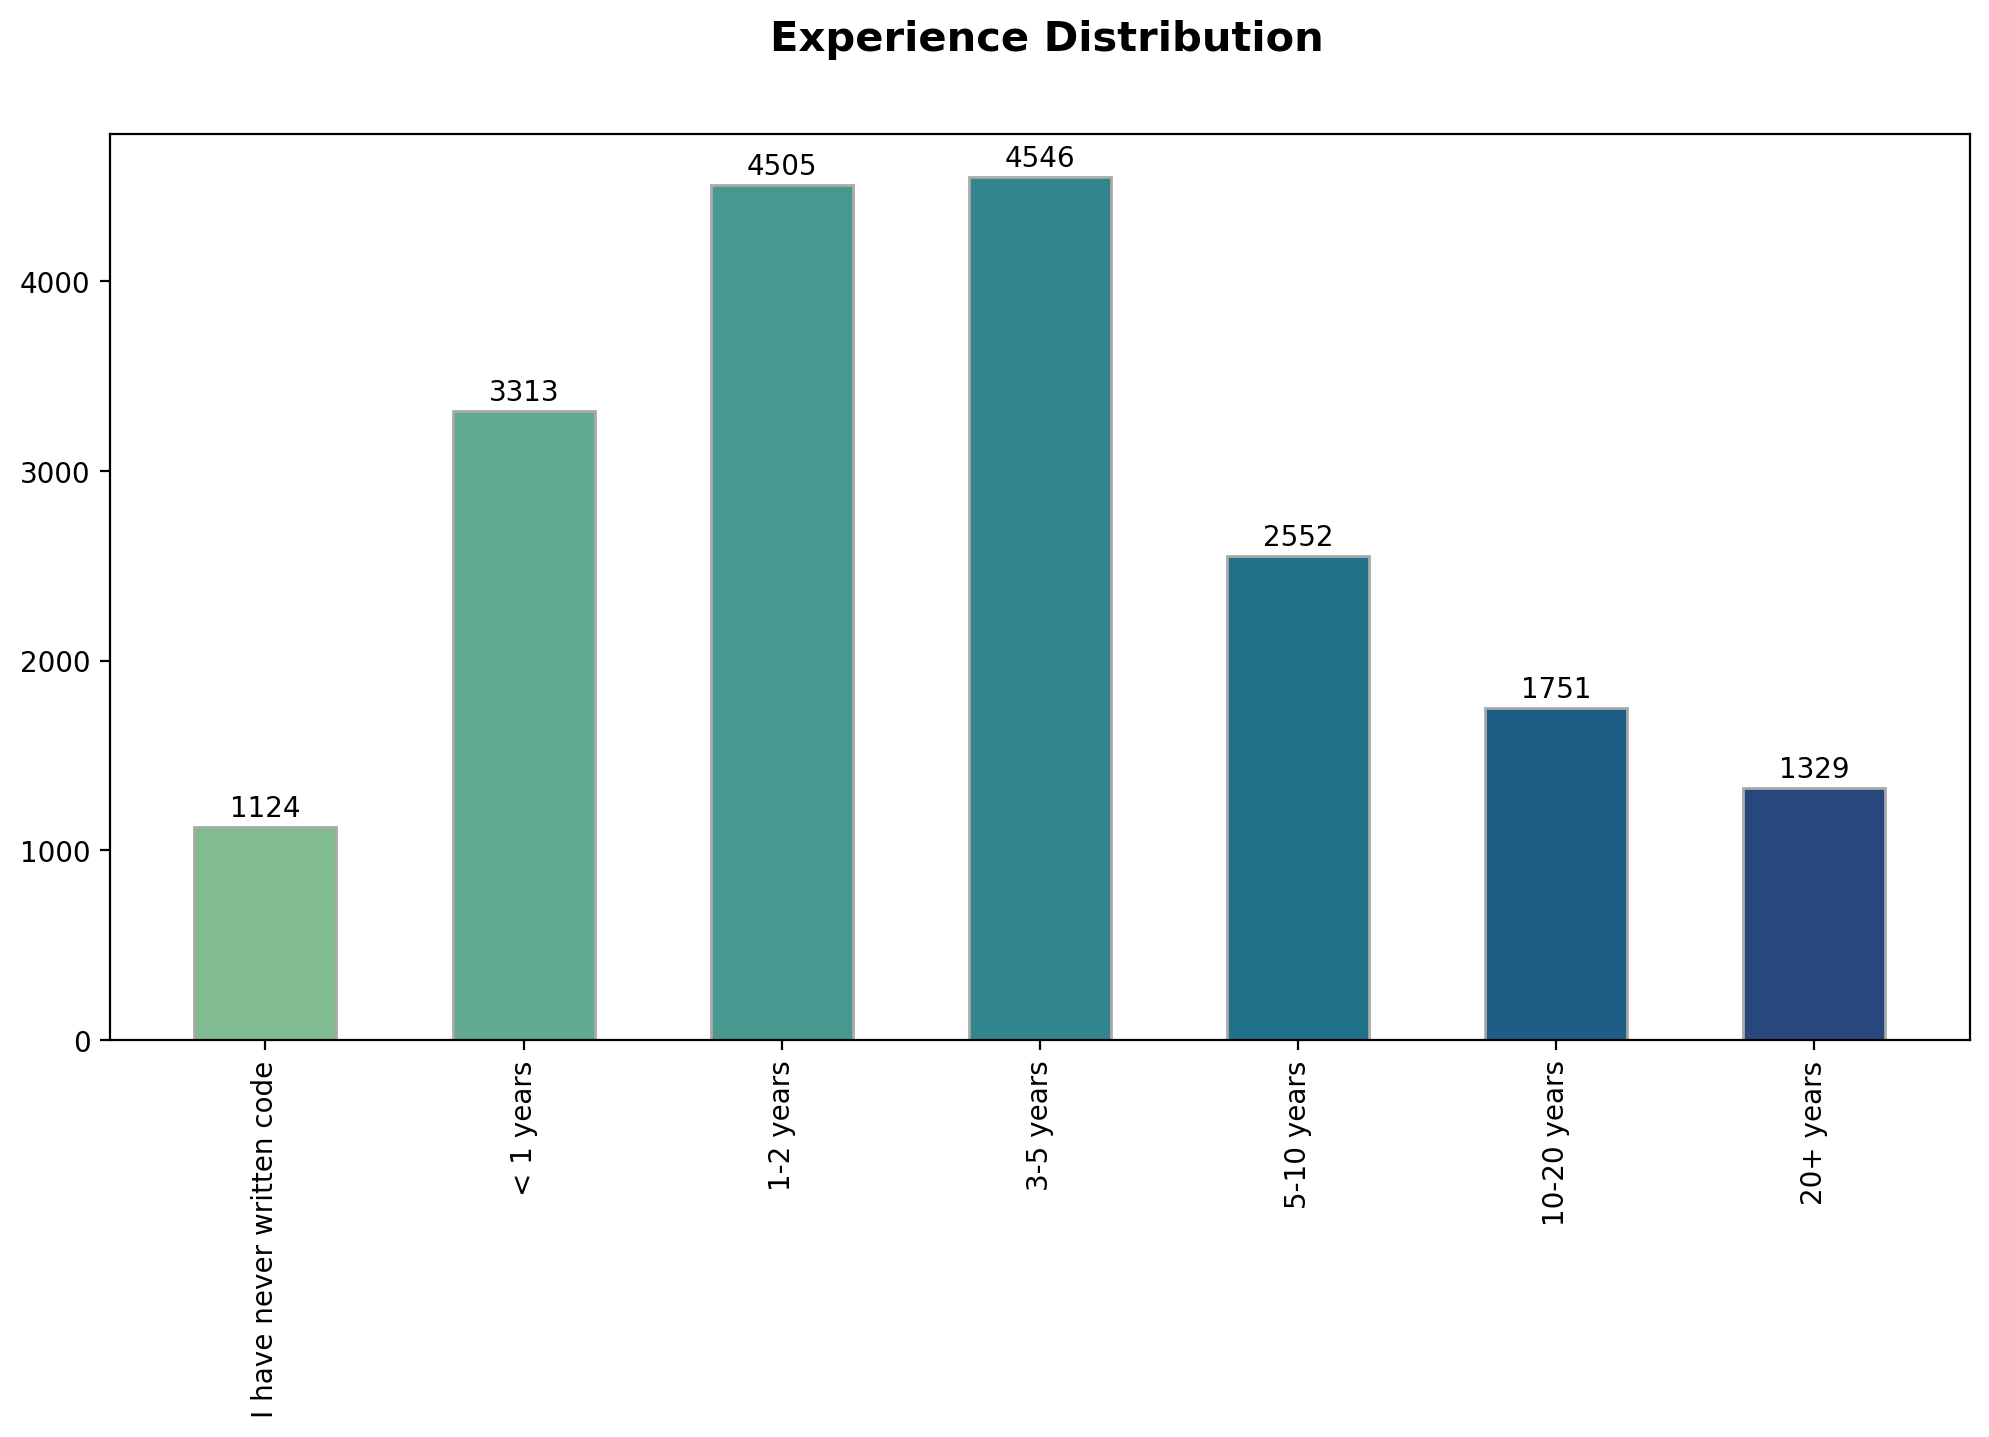

In [308]:
data_q6 = data.Q6.value_counts()[q6_cols]

fig,ax = plt.subplots(1,1, figsize = (12,6))

ax.bar(data_q6.index, data_q6,
       width = 0.55, edgecolor = "darkgray", color = sns.color_palette(palette = "crest",n_colors = 7))

for i in data_q6.index:
    ax.annotate(s = f"{data_q6[i]}",
                xy = (i, data_q6[i]+100),
                va = 'center', ha = 'center', fontfamily = 'Sans Serif', fontweight = 'light')
    
fig.text(0.4, 0.95, "Experience Distribution", fontfamily = "Sans Serif", fontsize = 15, fontweight = 'bold')
ax.set_xticklabels(data_q6.index, rotation = 90, fontfamily = 'Sans Serif')
plt.show()

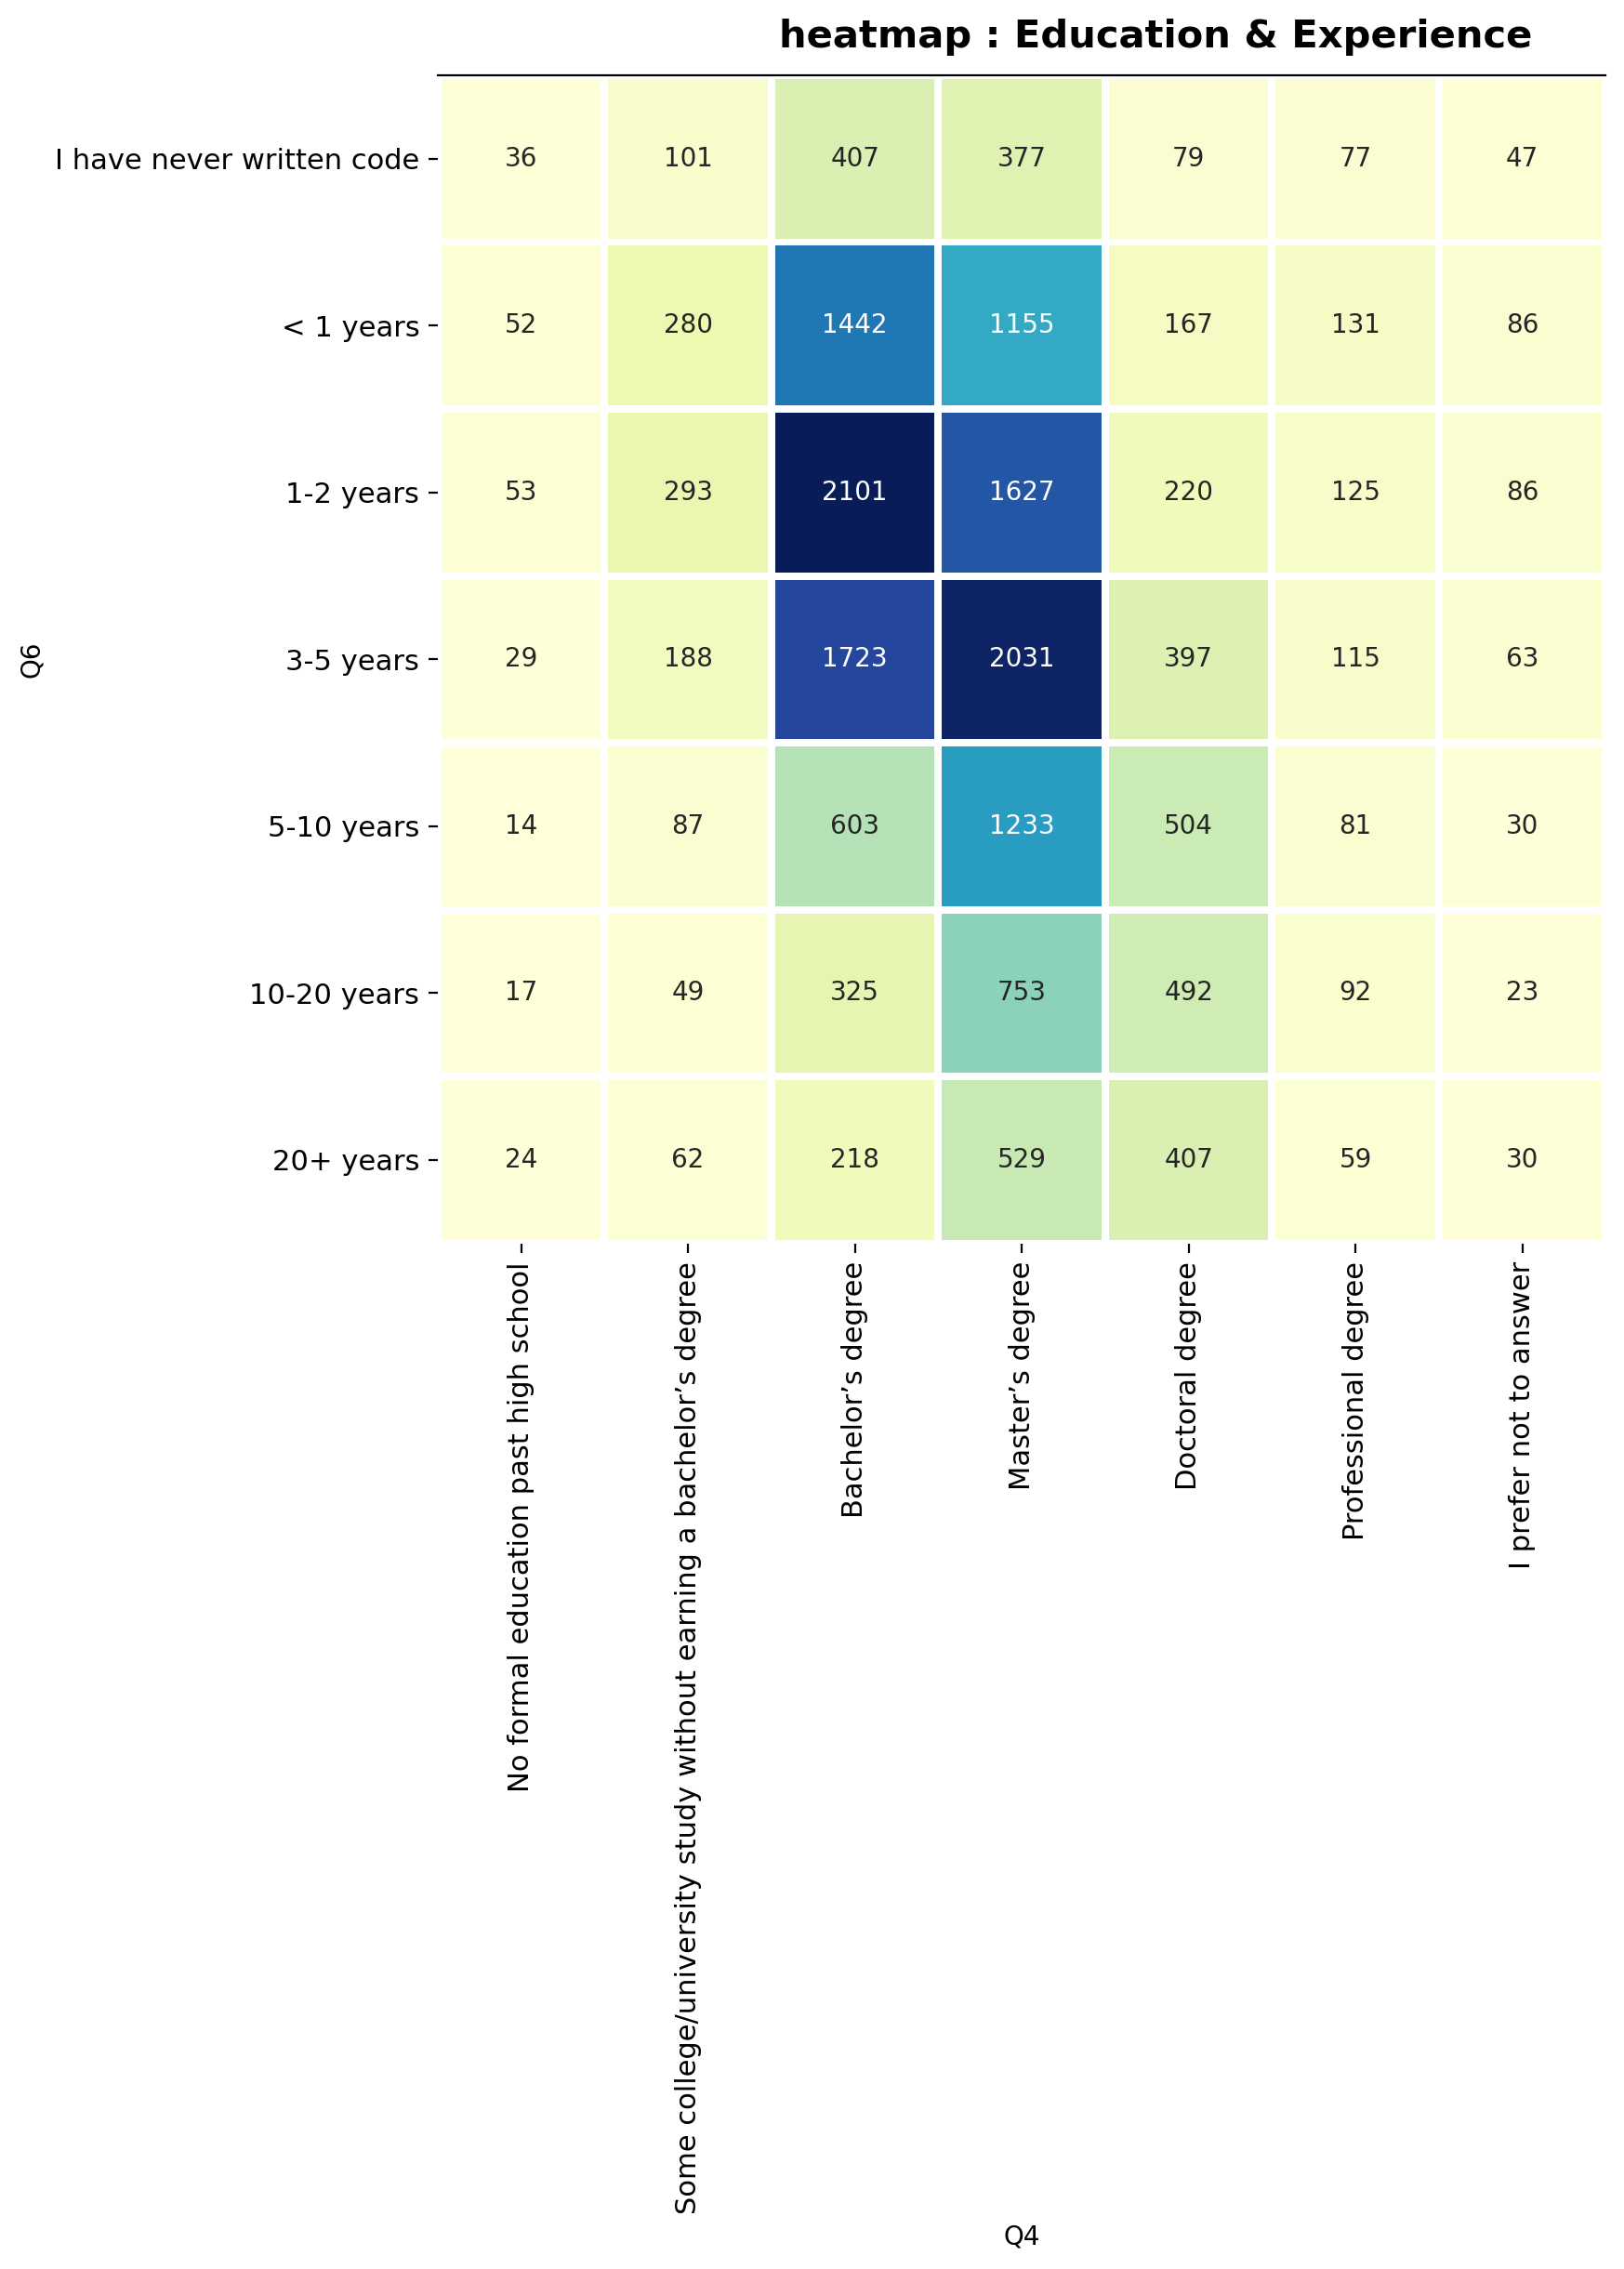

In [309]:
#Q4 & Q6 히트맵 생성을 위해 출처 코드에서는 data에 count가 1인 열을 추가하고, index는 Q6, columns = Q4를 놓은 상태로 피봇테이블 생성
# data['count'] = 1
# pd.pivot_table(data, values='count', index=['Q6'], columns=['Q4'], aggfunc=np.sum)
#groupby로도 생성 가능하므로 대체하여 사용

fig,ax = plt.subplots(1,1,figsize=(12,12))

sns.heatmap(data = data.groupby(["Q6","Q4"])["Q6"].count().unstack().loc[q6_cols,q4_cols],
            cmap = "YlGnBu",
            linewidth = 2.5,
            square = True,
            cbar = False,
            annot = True,
            fmt = 'd',
            ax=ax)

ax.spines['top'].set_visible(True)
fig.text(0.48,1, "heatmap : Education & Experience", fontsize = 15, fontfamily = 'Sans Serif', fontweight = "bold")

ax.set_xticklabels(ax.get_xticklabels(), fontfamily = 'Sans Serif', fontsize = 11)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily = 'Sans Serif', fontsize = 11)

plt.tight_layout()

## Q14 Visualization Library

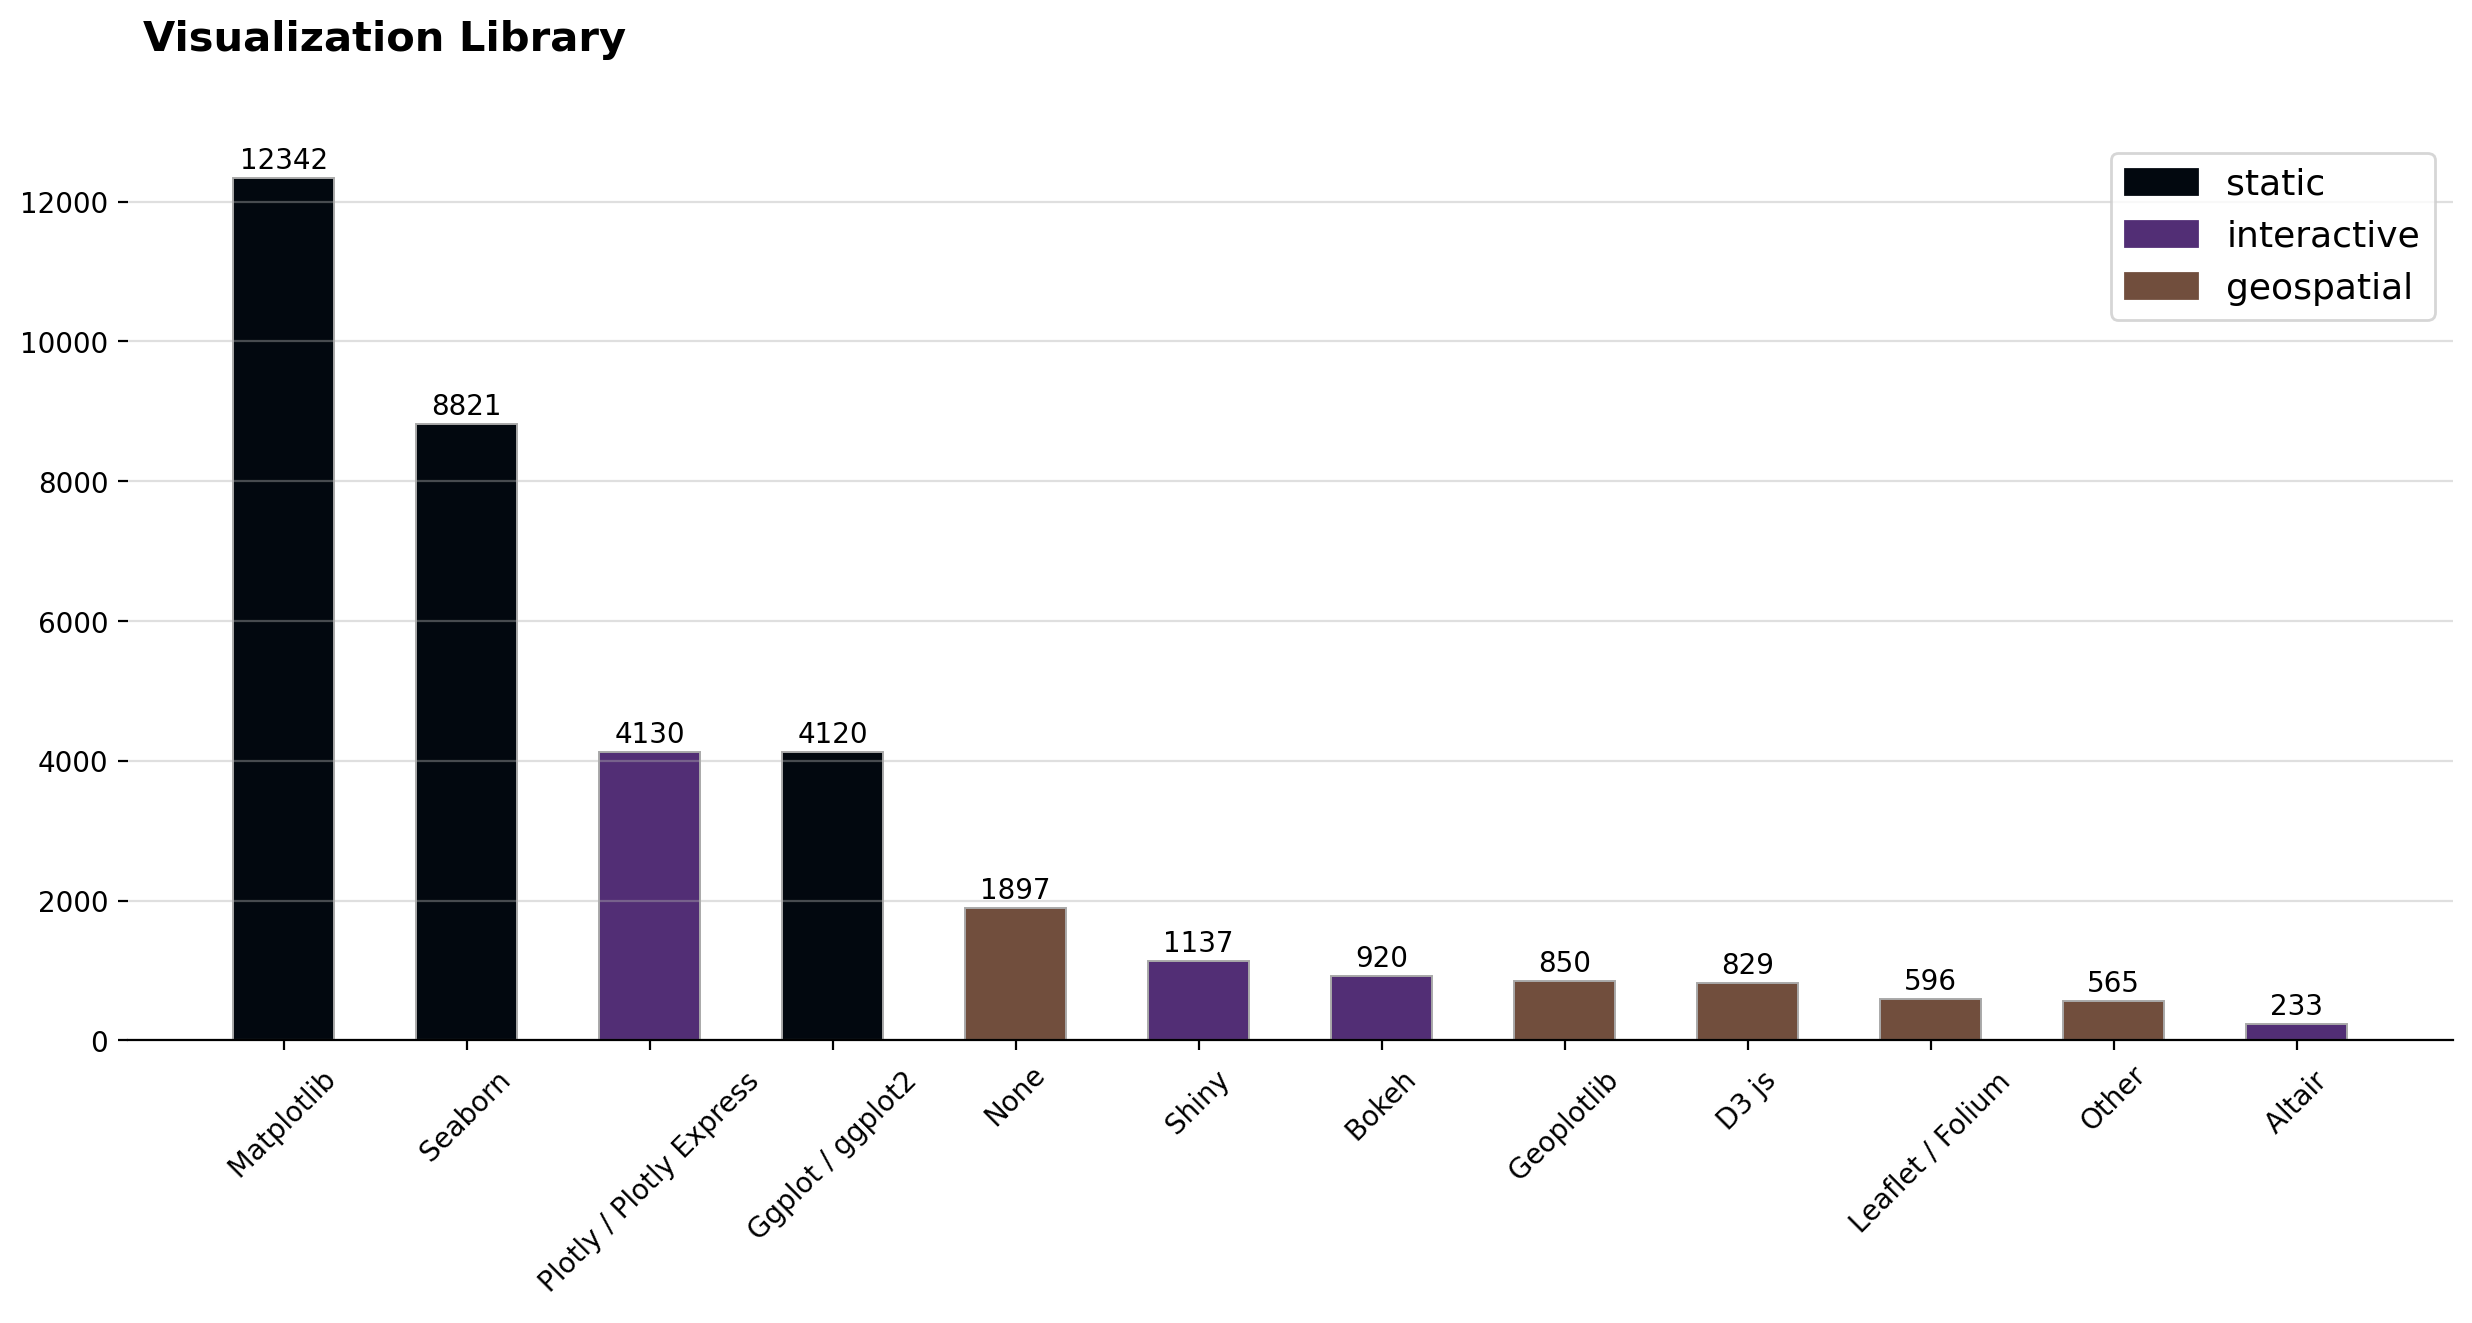

In [310]:
data_q14 = data.filter(regex = "^Q14")
data_q14_count = data_q14.describe().loc[["top","count"]].T.sort_values("count", ascending = False)
data_q14_count = data_q14_count.set_index('top')

#프로그램 종류에 따른 색상 지정
static = [' Matplotlib ', ' Seaborn ',' Ggplot / ggplot2 ']
interactive = [' Plotly / Plotly Express ',' Shiny ',' Altair ',' Bokeh ']
geo = ['None',' Geoplotlib ',' D3 js ', ' Leaflet / Folium ', 'Other']

data_q14_count["color"] = "lightgray"
data_q14_count.loc[data_q14_count.index.isin(static),"color"] = '#02080F'
data_q14_count.loc[data_q14_count.index.isin(interactive),"color"] = '#522e75'
data_q14_count.loc[data_q14_count.index.isin(geo),"color"] = '#714e3d'

fig,ax = plt.subplots(1,1,figsize = (15,6))

ax.bar(x = data_q14_count.index,
       height = data_q14_count["count"],
       width = 0.55,
       edgecolor = "darkgray",
       color = data_q14_count.color,
      linewidth = 0.7)

for i in data_q14_count.index:
    ax.annotate(s = f"{data_q14_count['count'][i]}",
                xy = (i, data_q14_count["count"][i]+250),
                va = 'center', ha = 'center', fontfamily = 'Sans Serif', fontweight = "light")
    
for s in ['top', 'left','right']:
    ax.spines[s].set_visible(False)
    
ax.set_xticklabels(data_q14_count.index, fontfamily = 'Sans Serif', fontweight = 'light', rotation = 45)
ax.grid(axis= 'y', ls = '-', alpha = 0.4)
fig.text(0.13,0.95,"Visualization Library", fontfamily = 'Sans Serif', fontsize = 15, fontweight = 'bold')

static = mpatches.Patch(color='#02080F', label='static')
interactive = mpatches.Patch(color='#522e75', label='interactive')
geo = mpatches.Patch(color='#714e3d', label='geospatial')

plt.legend(handles=[static, interactive, geo], fontsize=13) #handles을 반드시 기입해야 함
plt.show()

## Q2 & Q5 & Q15 Gender / Position / ML Experience

In [311]:
q5_cols = ['Business Analyst'
 ,'Data Analyst'
 ,'Data Engineer'
 ,'Data Scientist'
 ,'DBA/Database Engineer'
 ,'Machine Learning Engineer'
 ,'Product/Project Manager'
 ,'Research Scientist'
 ,'Software Engineer'
 ,'Statistician'
 ,'Student'
 ,'Currently not employed'
 ,'Other']

q15_cols = [
    'I do not use machine learning methods'
    ,'Under 1 year'
    ,'1-2 years'
    ,'2-3 years'
    ,'3-4 years'
    ,'4-5 years'
    ,'5-10 years'
    ,'10-20 years'
    ,'20 or more years']

data_q5q15 = data.groupby(["Q5","Q15"])["Q15"].count().unstack().fillna(0).astype('int').loc[q5_cols,q15_cols]
data_q5q15_man = data[data.Q2 == "Man"].groupby(["Q5","Q15"])["Q15"].count().unstack().fillna(0).astype('int').loc[q5_cols,q15_cols]
data_q5q15_woman = data[data.Q2 == "Woman"].groupby(["Q5","Q15"])["Q15"].count().unstack().fillna(0).astype('int').loc[q5_cols,q15_cols]

In [312]:
#pie chart function 
# https://stackoverflow.com/questions/56337732/how-to-plot-scatter-pie-chart-using-matplotlib

def drawPieMarker(xs, ys, ratios, sizes, colors, ax):
    markers = []
    previous = 0
    # calcuate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x = [0] + np.cos(np.linspace(previous, this, 50)).tolist() + [0]
        y = [0] + np.sin(np.linspace(previous, this, 50)).tolist() + [0]
        xy = np.column_stack([x,y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker, alpha = 0.7)

In [313]:
data_q5q15_man.head()

Q15                    I do not use machine learning methods  Under 1 year  \
Q5                                                                           
Business Analyst                                          83           198   
Data Analyst                                             139           404   
Data Engineer                                             28            83   
Data Scientist                                            45           348   
DBA/Database Engineer                                     26            24   

Q15                    1-2 years  2-3 years  3-4 years  4-5 years  5-10 years  \
Q5                                                                              
Business Analyst             124         50         22         21          13   
Data Analyst                 224         94         49         32          21   
Data Engineer                104         53         23         23          16   
Data Scientist               447        333        261        230         279   
DBA/Database Engineer         19         13          7          2           2   

Q15                    10-20 years  20 or more years  
Q5                                                    
Business Analyst                 2                 2  
Data Analyst                     8                 3  
Data Engineer                    2                 1  
Data Scientist                  84                47  
DBA/Database Engineer            0                 0

In [314]:
fig = plt.figure(figsize=(20, 23), dpi=400)
gs = fig.add_gridspec(5, 5)

#pie chart
ax_plot = fig.add_subplot(gs[1:4, 0:4]) 
for q15_idx in q15_cols:
    for q5_idx in q5_cols[::-1]:
        man = data_q5q15_man.loc[q5_idx,q15_idx]
        woman = data_q5q15_woman.loc[q5_idx,q15_idx]
        tot = data_q5q15.loc[q5_idx,q15_idx]
        drawPieMarker(q15_idx,q5_idx, [man/(man+woman), woman/(man+woman)], tot*2.5, ['#004c70', '#990000'], ax=ax_plot)
        
# ax_plot.grid(linewidth = 0.2, zorder = 0)
ax_plot.grid(linewidth = 0.2)
ax_plot.set_xticklabels(q15_cols, fontsize = 15, fontfamily = 'Sans Serif', rotation = 90)
ax_plot.set_yticklabels(q5_cols, fontsize = 15, fontfamily = 'Sans Serif')

#Pos
ax_pos = fig.add_subplot(gs[0,:4], sharex = ax_plot)
# *sharex 참고 : https://sacko.tistory.com/34
data_q15_woman = data.loc[data.Q2 == 'Woman',"Q15"].value_counts()[q15_cols]
ax_pos.bar(data_q15_woman.index, data_q15_woman, width = 0.45, alpha = 0.7, color = '#990000')
data_q15_man = data.loc[data.Q2 =="Man", "Q15"].value_counts()[q15_cols]
ax_pos.bar(data_q15_man.index, data_q15_man, width = 0.45, alpha = 0.7, color = '#004c70', bottom = data_q15_woman)
plt.setp(ax_pos.get_xticklabels(),visible = False)

#Exp
ax_exp = fig.add_subplot(gs[1:4,4],sharey = ax_plot)
data_q5_woman = data.loc[data.Q2=="Woman", "Q5"].value_counts()[q5_cols]
data_q5_man = data.loc[data.Q2=="Man", "Q5"].value_counts()[q5_cols]
ax_exp.barh(data_q5_woman.index[::-1],data_q5_woman[::-1], height = 0.45, alpha = 0.7, color = '#990000')
ax_exp.barh(data_q5_man.index[::-1],data_q5_man[::-1], height = 0.45, alpha = 0.7, color = '#004c70',left = data_q5_woman[::-1])
plt.setp(ax_exp.get_yticklabels(), visible = False)

#spines
for s in ['top', 'left', 'right', 'bottom']:
    ax_plot.spines[s].set_visible(False)
    ax_pos.spines[s].set_visible(False)
    ax_exp.spines[s].set_visible(False)
    
fig.text(0.8, 0.9, 'Gender & Position & ML Experience', fontweight='bold', fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart', fontweight='light', fontfamily='serif', fontsize=20, ha='right')
plt.tight_layout()
plt.show()

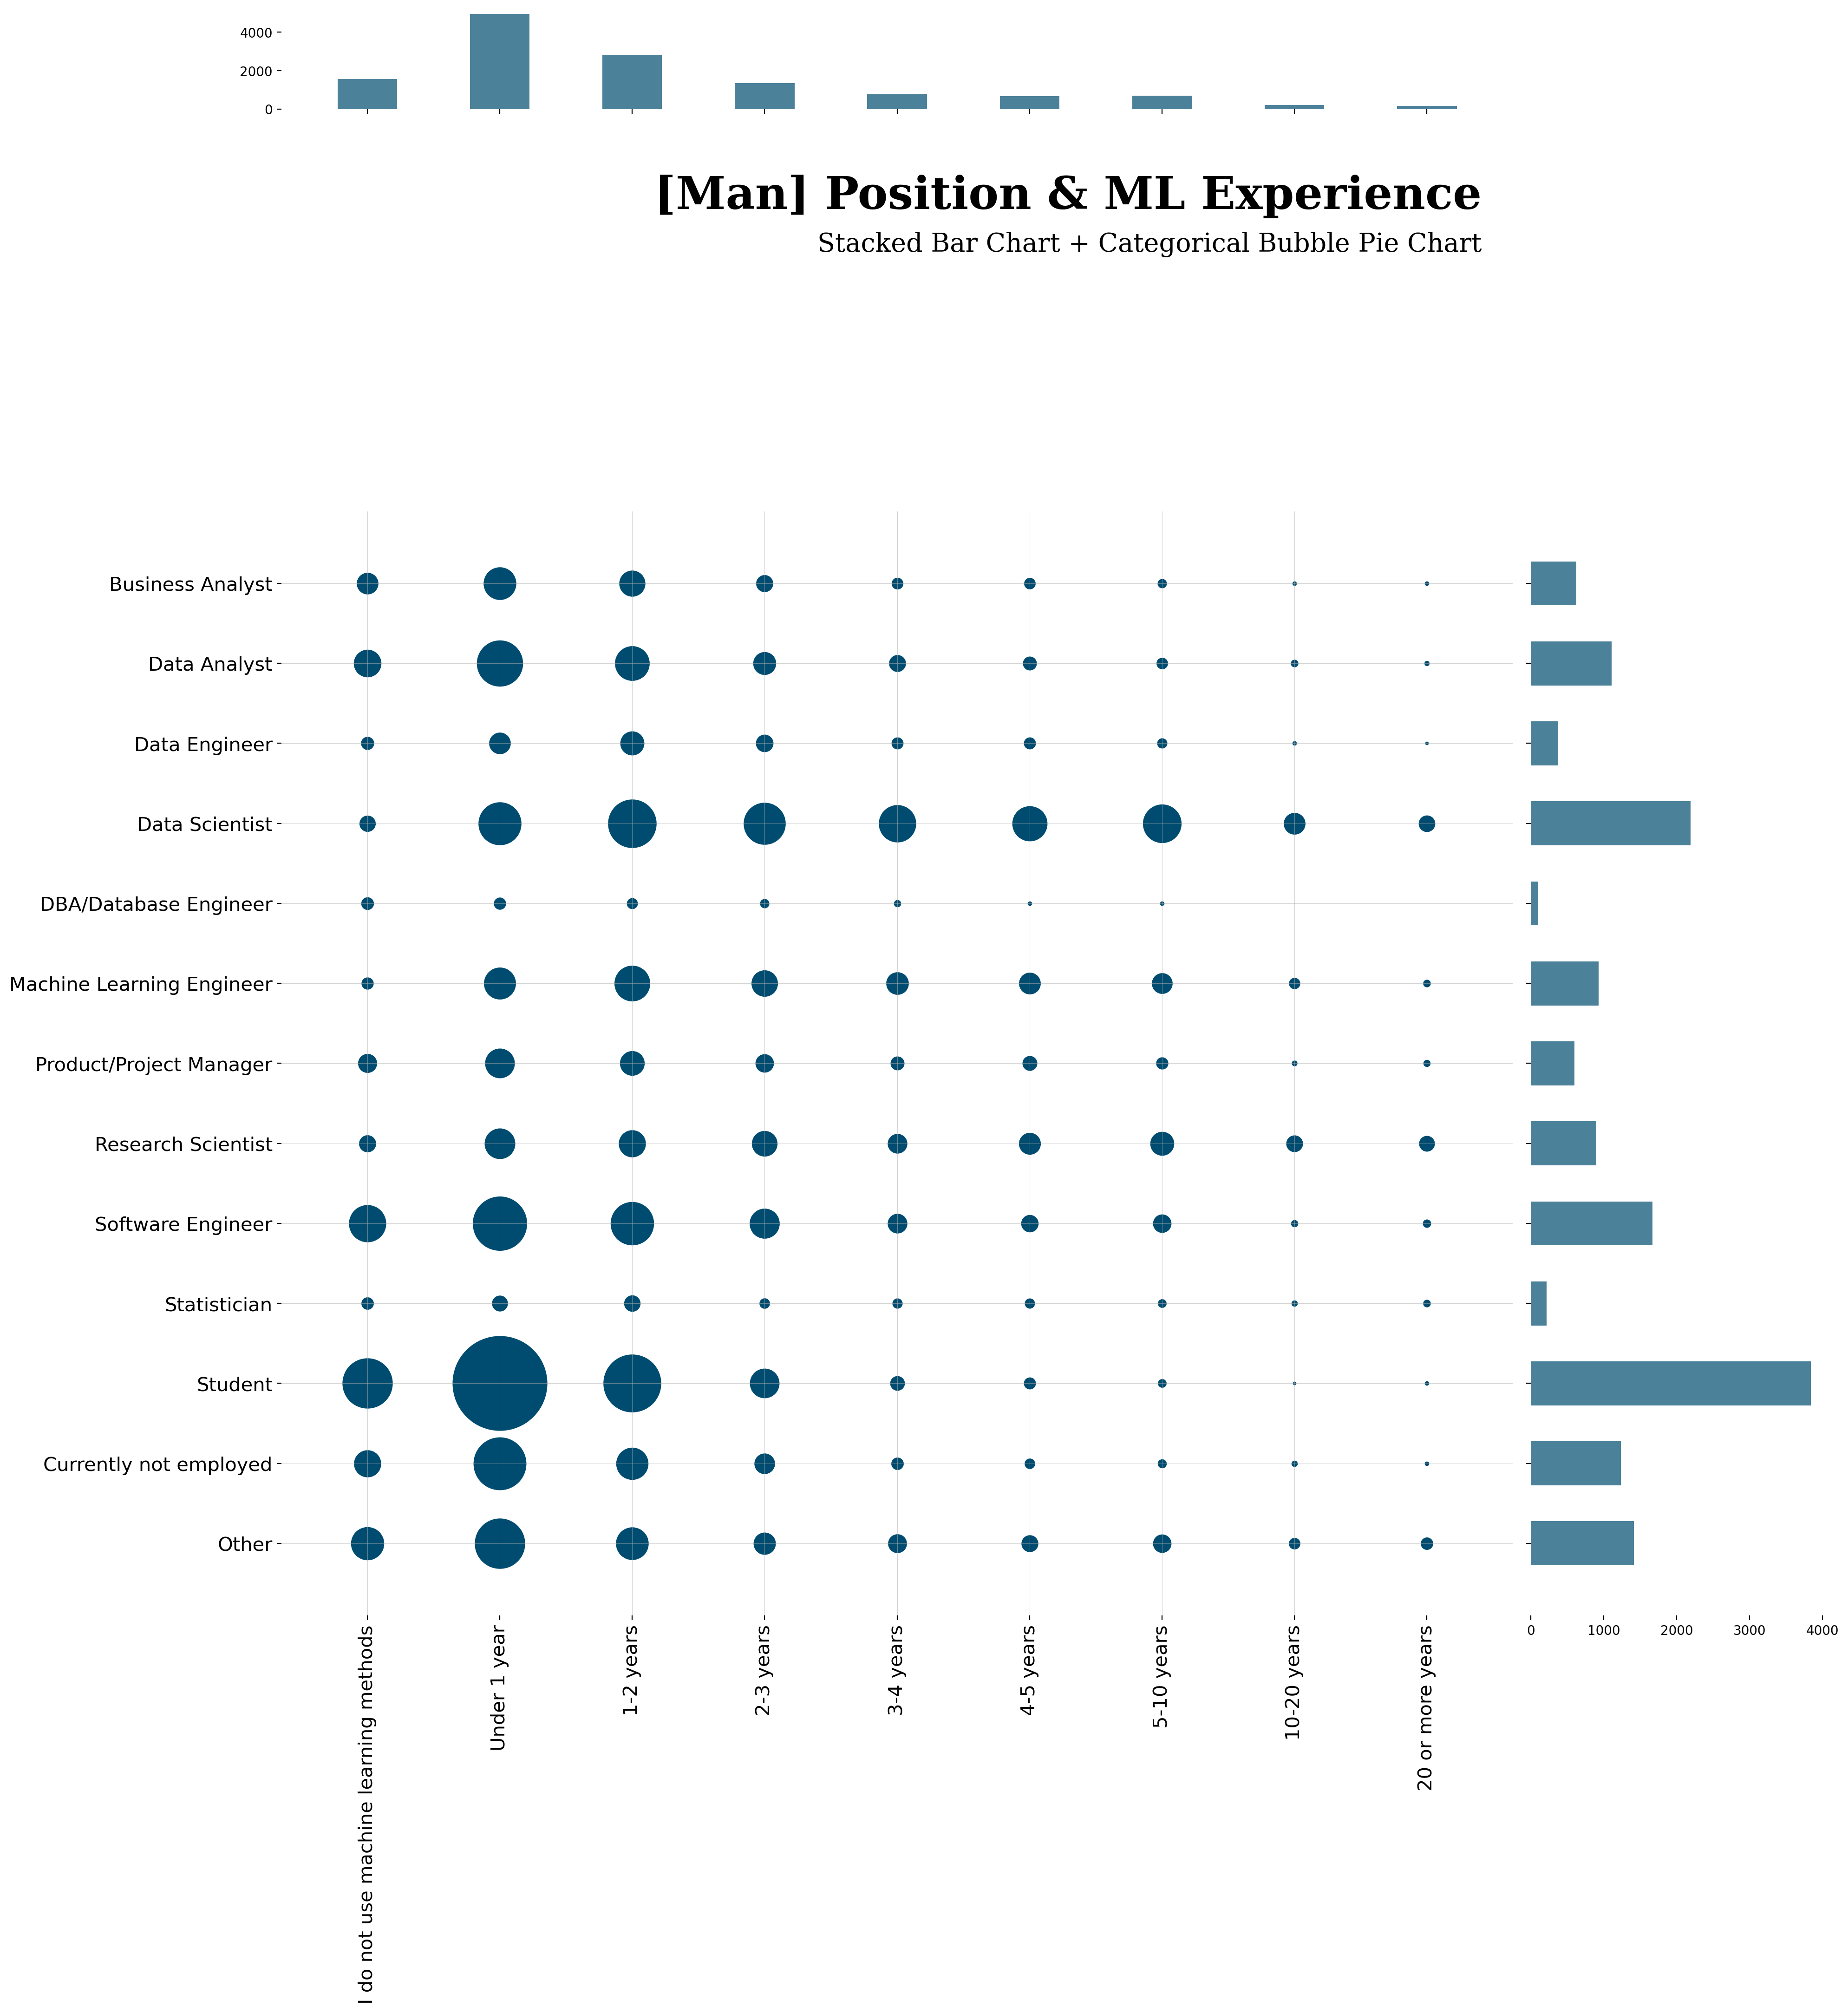

In [315]:
fig = plt.figure(figsize = (20,23), dpi = 200)
grid = fig.add_gridspec(5,5)

#pie
ax_plot = fig.add_subplot(gs[1:4,0:4])
for q5_idx in q5_cols[::-1]:
    for q15_idx in q15_cols:
        man = data_q5q15_man.loc[q5_idx, q15_idx]
#         woman = data_q5q15_woman.loc[q5_idx, q15_idx]
        tot = data_q5q15.loc[q5_idx, q15_idx]
        ax_plot.scatter(q15_idx,q5_idx, s = man*3, color = "#004c70")
        
ax_plot.grid(linewidth = 0.2, zorder = 0)
ax_plot.set_yticklabels(q5_cols[::-1], fontsize = 15, fontfamily = 'Sans Serif')
ax_plot.set_xticklabels(q15_cols, fontsize = 15, fontfamily = 'Sans Serif', rotation = 90)

#Pos
ax_pos = fig.add_subplot(gs[0,:4], sharex = ax_plot)
data_q15_man = data.loc[data.Q2=="Man", "Q15"].value_counts()[q15_cols]
ax_pos.bar(data_q15_man.index, data_q15_man, alpha = 0.7, width = 0.45, color = "#004c70")
plt.setp(ax_pos.get_xticklabels(),visible = False)

#Exp
ax_exp = fig.add_subplot(gs[1:4,4], sharey = ax_plot)
data_q5_man = data.loc[data.Q2 == "Man", "Q5"].value_counts()[q5_cols][::-1]
ax_exp.barh(data_q5_man.index,data_q5_man,height = 0.55, alpha = 0.7, color = "#004c70")
plt.setp(ax_exp.get_yticklabels(), visible = False)

#spines

for s in ['top','bottom','left','right']:
    ax_plot.spines[s].set_visible(False)
    ax_pos.spines[s].set_visible(False)
    ax_exp.spines[s].set_visible(False)

fig.text(0.8, 0.9, '[Man] Position & ML Experience', fontweight='bold', fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart', fontweight='light', fontfamily='serif', fontsize=20, ha='right')

plt.tight_layout()
plt.show()

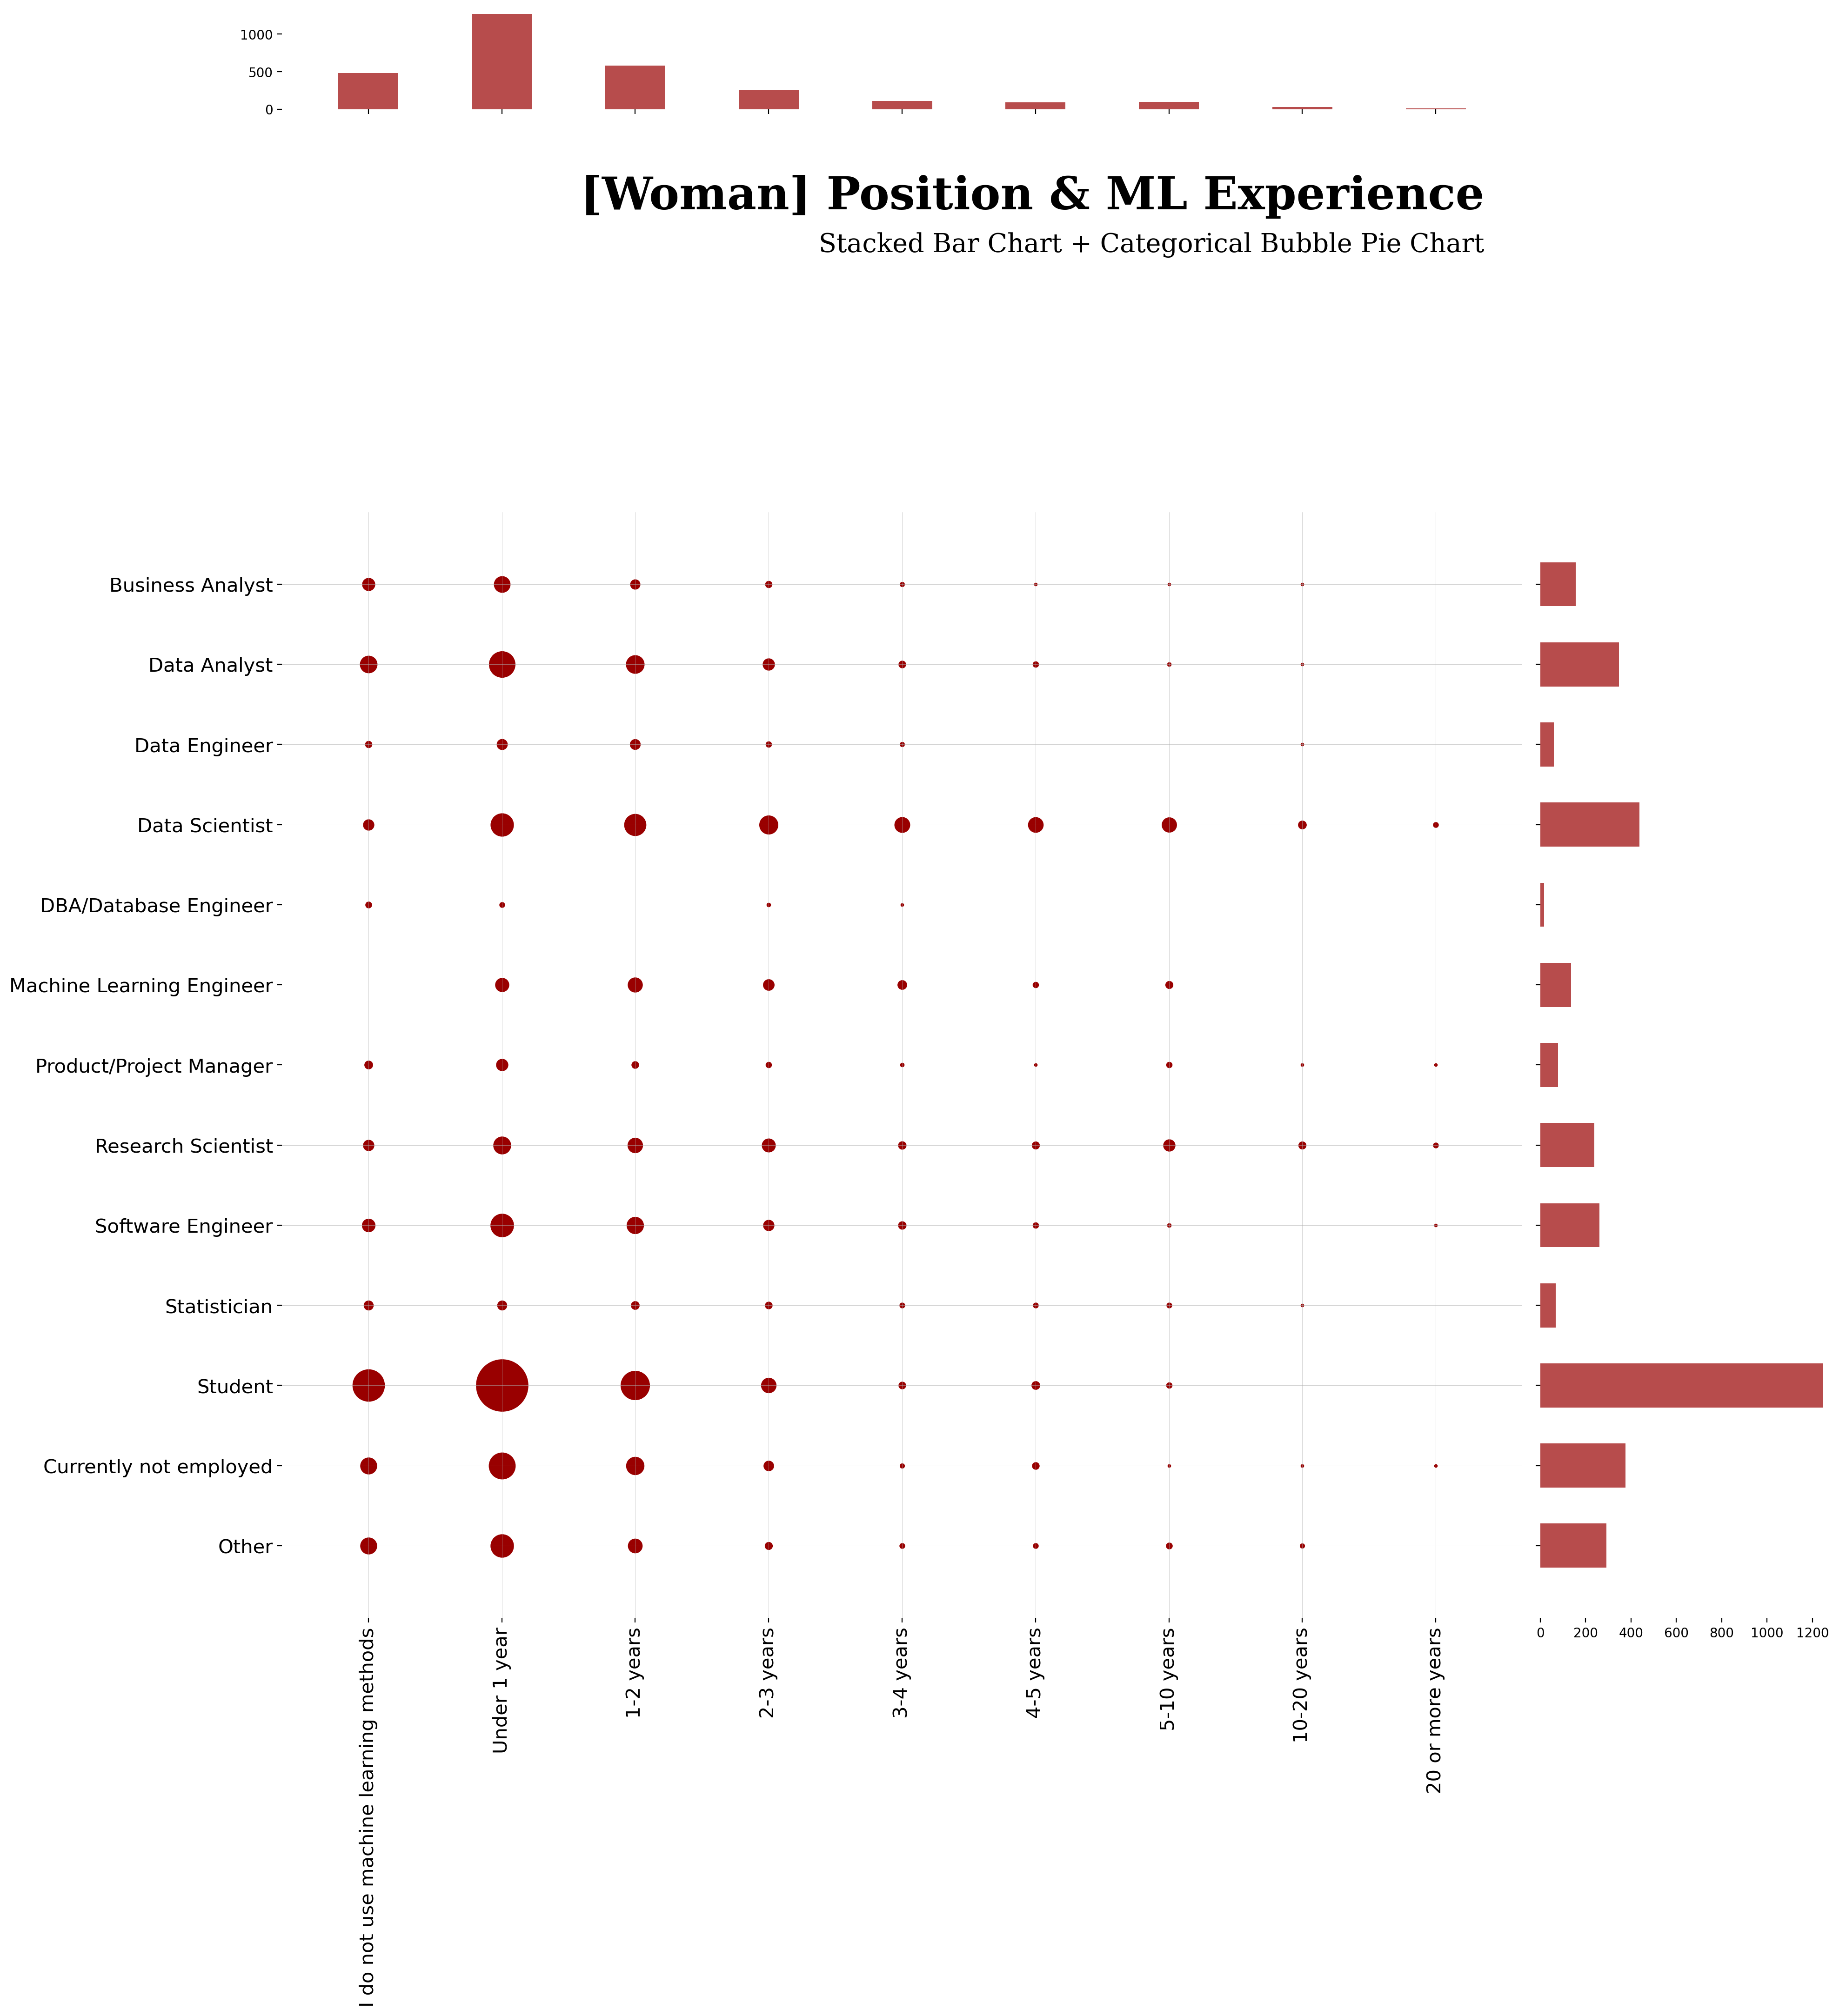

In [316]:
fig = plt.figure(figsize = (20,23), dpi = 200)
grid = fig.add_gridspec(5,5)

#pie
ax_plot = fig.add_subplot(gs[1:4,0:4])
for q5_idx in q5_cols[::-1]:
    for q15_idx in q15_cols:
#         man = data_q5q15_man.loc[q5_idx, q15_idx]
        woman = data_q5q15_woman.loc[q5_idx, q15_idx]
        tot = data_q5q15.loc[q5_idx, q15_idx]
        ax_plot.scatter(q15_idx,q5_idx, s = woman*3, color = "#990000")
        
ax_plot.grid(linewidth = 0.2, zorder = 0)
ax_plot.set_yticklabels(q5_cols[::-1], fontsize = 15, fontfamily = 'Sans Serif')
ax_plot.set_xticklabels(q15_cols, fontsize = 15, fontfamily = 'Sans Serif', rotation = 90)

#Pos
ax_pos = fig.add_subplot(gs[0,:4], sharex = ax_plot)
data_q15_woman = data.loc[data.Q2=="Woman", "Q15"].value_counts()[q15_cols]
ax_pos.bar(data_q15_woman.index, data_q15_woman, alpha = 0.7, width = 0.45, color = "#990000")
plt.setp(ax_pos.get_xticklabels(),visible = False)

#Exp
ax_exp = fig.add_subplot(gs[1:4,4], sharey = ax_plot)
data_q5_woman = data.loc[data.Q2 == "Woman", "Q5"].value_counts()[q5_cols][::-1]
ax_exp.barh(data_q5_woman.index,data_q5_woman,height = 0.55, alpha = 0.7, color = "#990000")
plt.setp(ax_exp.get_yticklabels(), visible = False)

#spines

for s in ['top','bottom','left','right']:
    ax_plot.spines[s].set_visible(False)
    ax_pos.spines[s].set_visible(False)
    ax_exp.spines[s].set_visible(False)

fig.text(0.8, 0.9, '[Woman] Position & ML Experience', fontweight='bold', fontfamily='serif', fontsize=35, ha='right') 
fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart', fontweight='light', fontfamily='serif', fontsize=20, ha='right')

plt.tight_layout()
plt.show()

## Q24. Compensation

In [317]:
q24_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
'10,000-14,999','15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999',
'100,000-124,999', '125,000-149,999',  '150,000-199,999', '200,000-249,999',  '250,000-299,999', '300,000-500,000', '> $500,000']

data_q24 = data['Q24'].value_counts()[q24_order]

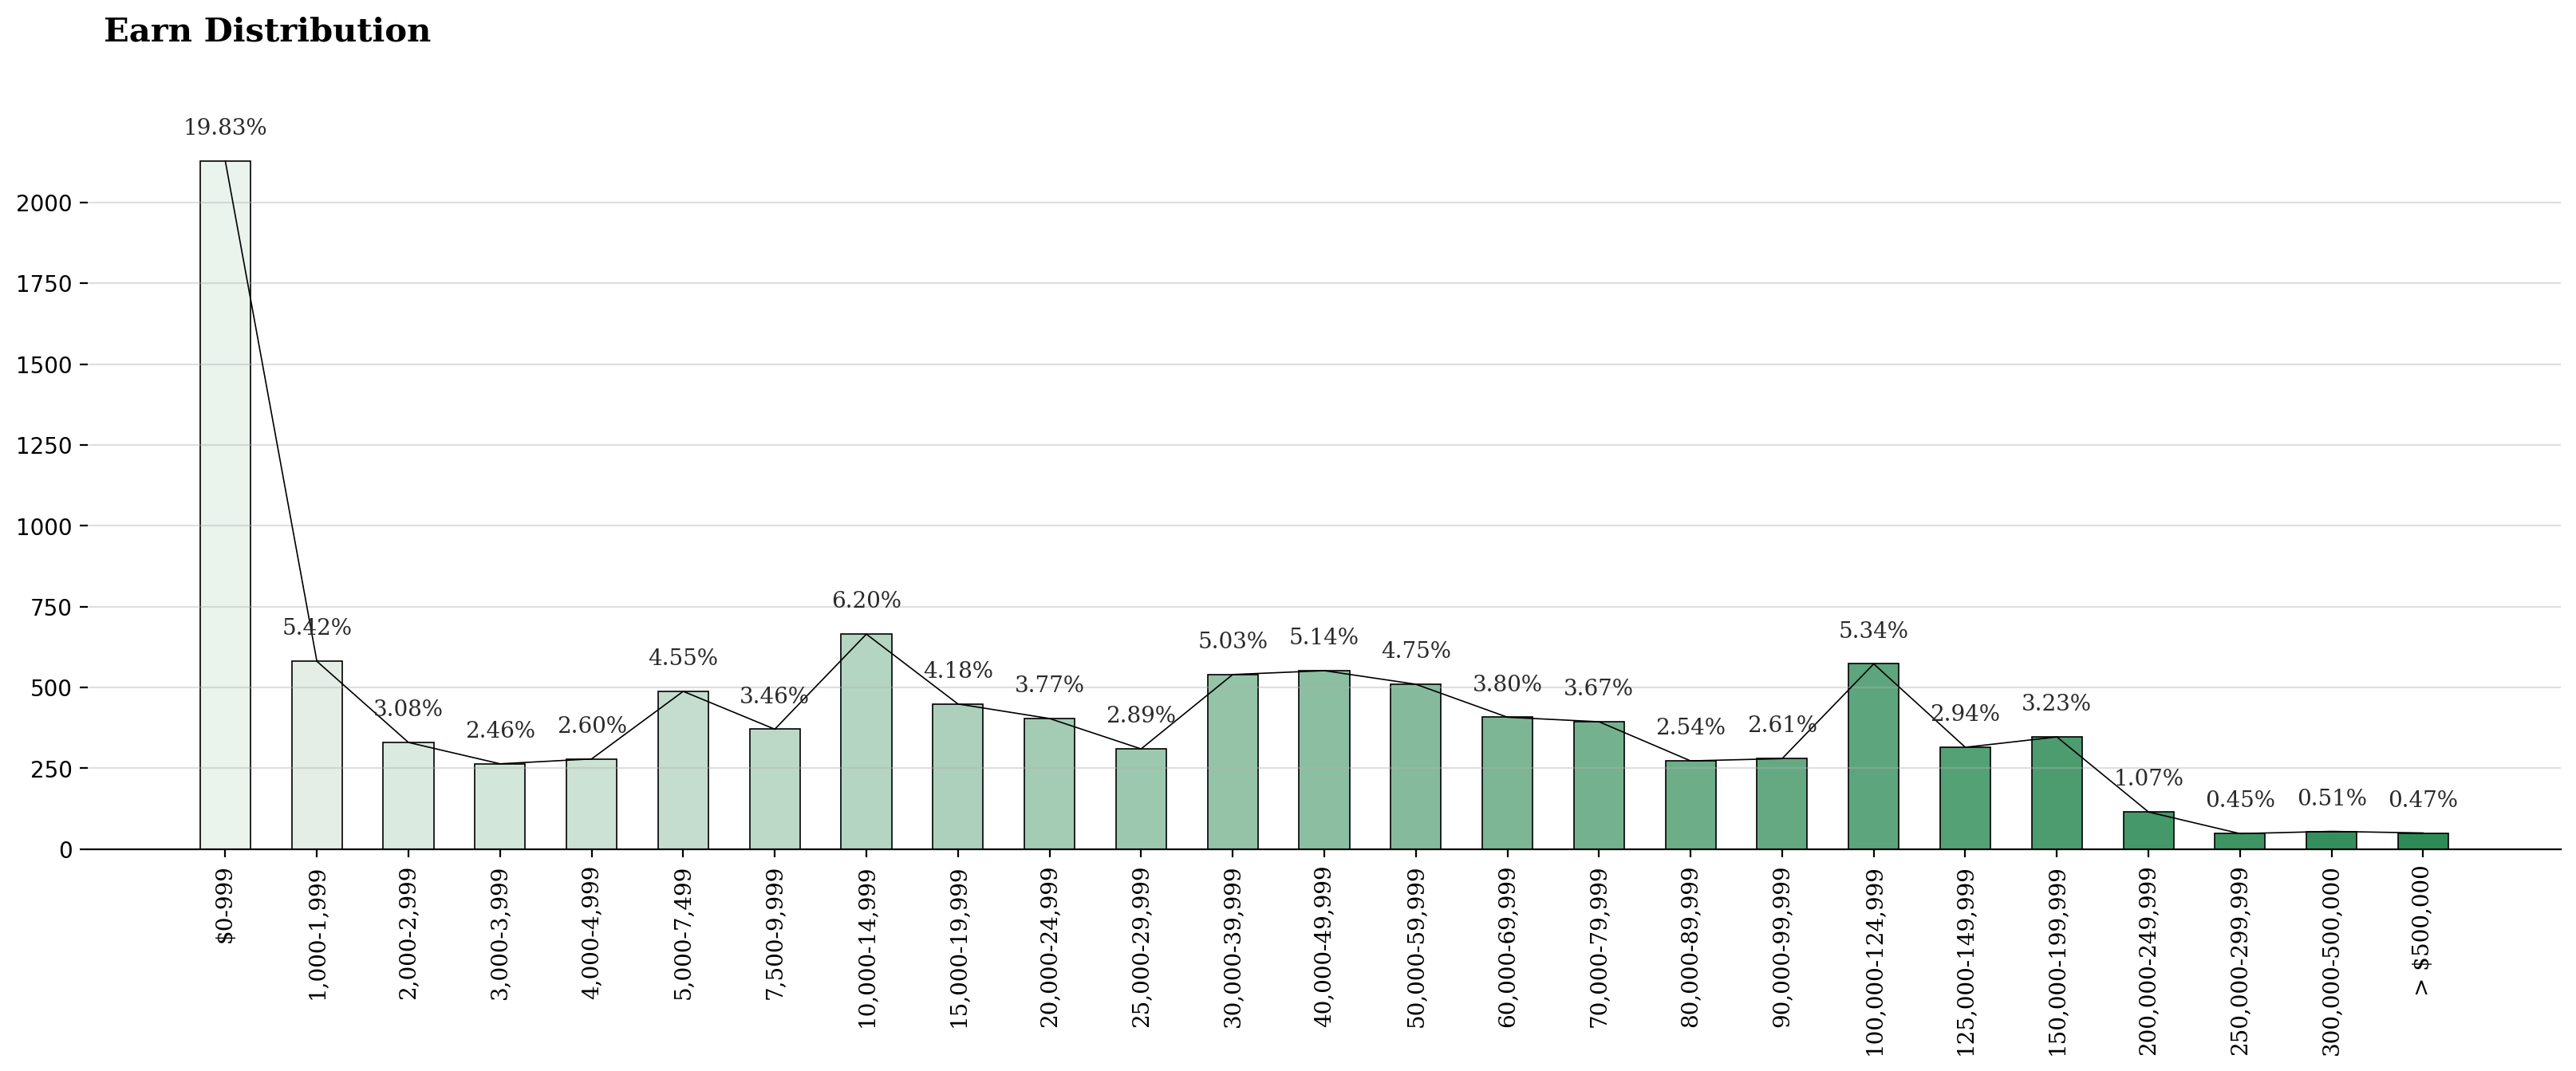

In [318]:
fig, ax = plt.subplots(1,1, figsize=(20, 6), dpi=200)
ax.bar(data_q24.index, data_q24, width=0.55, 
       edgecolor='black', color=sns.light_palette("seagreen", len(data_q24)),
       linewidth=0.6)

ax.plot(data_q24.index, data_q24, c='k', linewidth=0.6)

for i in data_q24.index:
    ax.annotate(f"{data_q24[i]/data_q24.sum()*100:.2f}%", 
                   xy=(i, data_q24[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#2a2a2a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q24.index, fontfamily='serif', rotation=90)

fig.text(0.13, 0.97, 'Earn Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

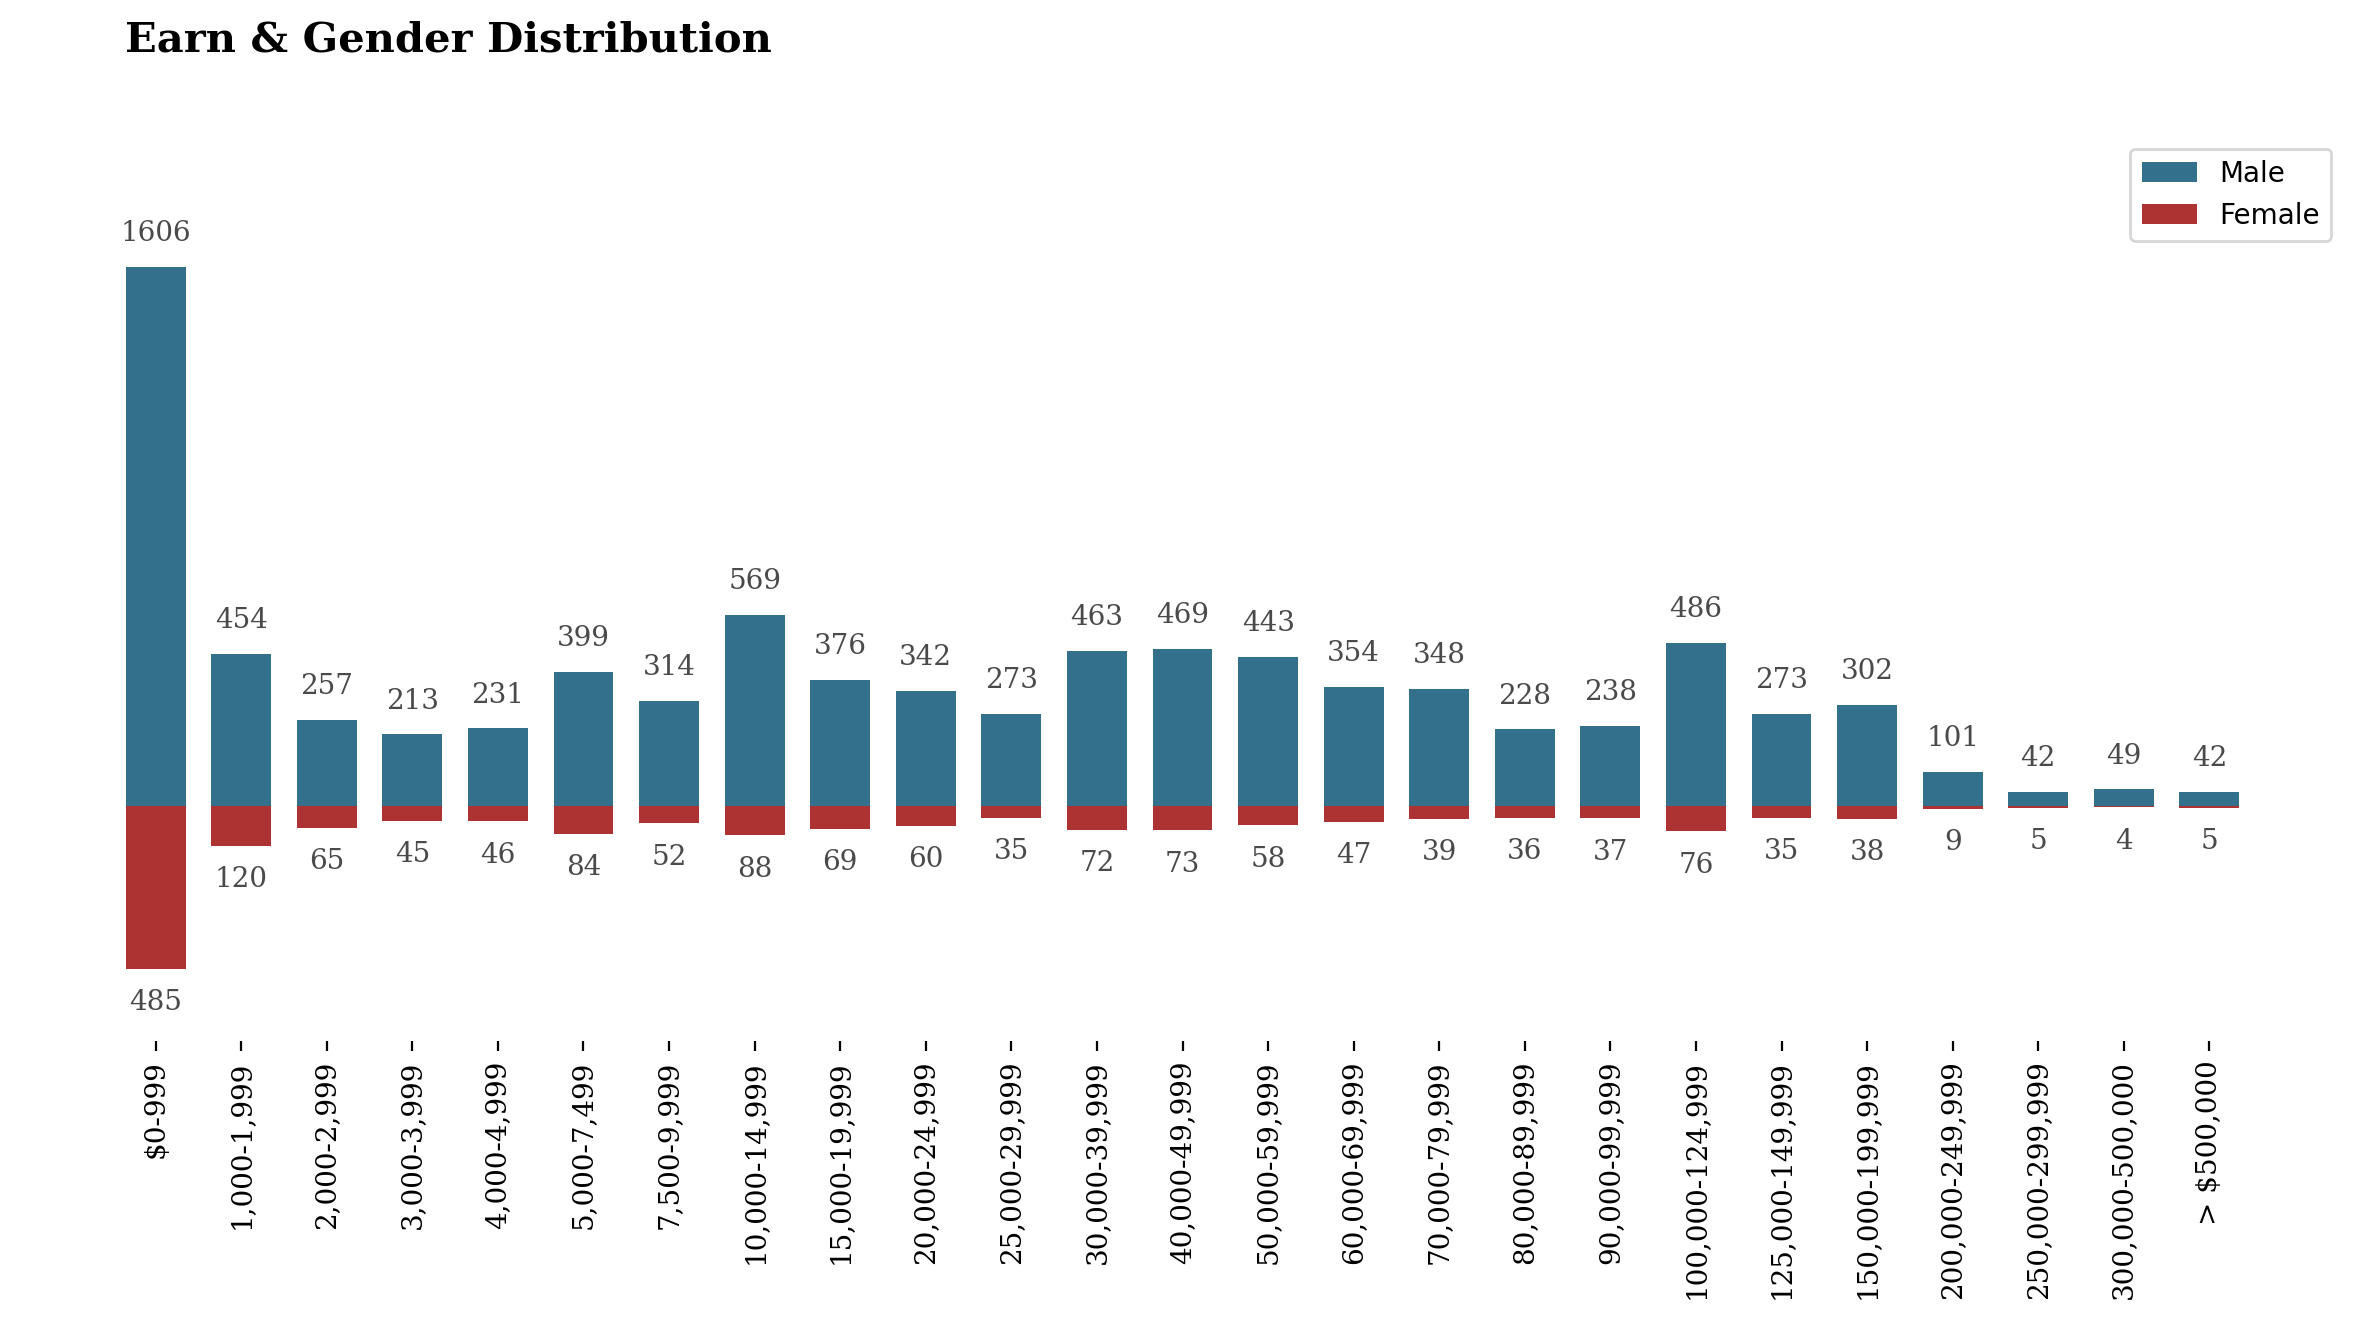

In [319]:
# Q2 Analysis
man = data[data['Q2']=='Man']['Q24'].value_counts()[q24_order]
woman = -data[data['Q2']=='Woman']['Q24'].value_counts()[q24_order]

fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(man.index, man, width=0.7, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.7, color='#990000', alpha=0.8, label='Female')
ax.set_ylim(-700, 2000)

for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')    

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax.set_yticks([])   
ax.legend()
fig.text(0.16, 0.95, 'Earn & Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
plt.show()

In [320]:
data_q5q24 = data.groupby("Q5")["Q24"].value_counts().unstack().loc[:,q24_order]
data_q5q24 = (data_q5q24.T /data_q5q24.sum(axis=1)).cumsum()
1//6

0

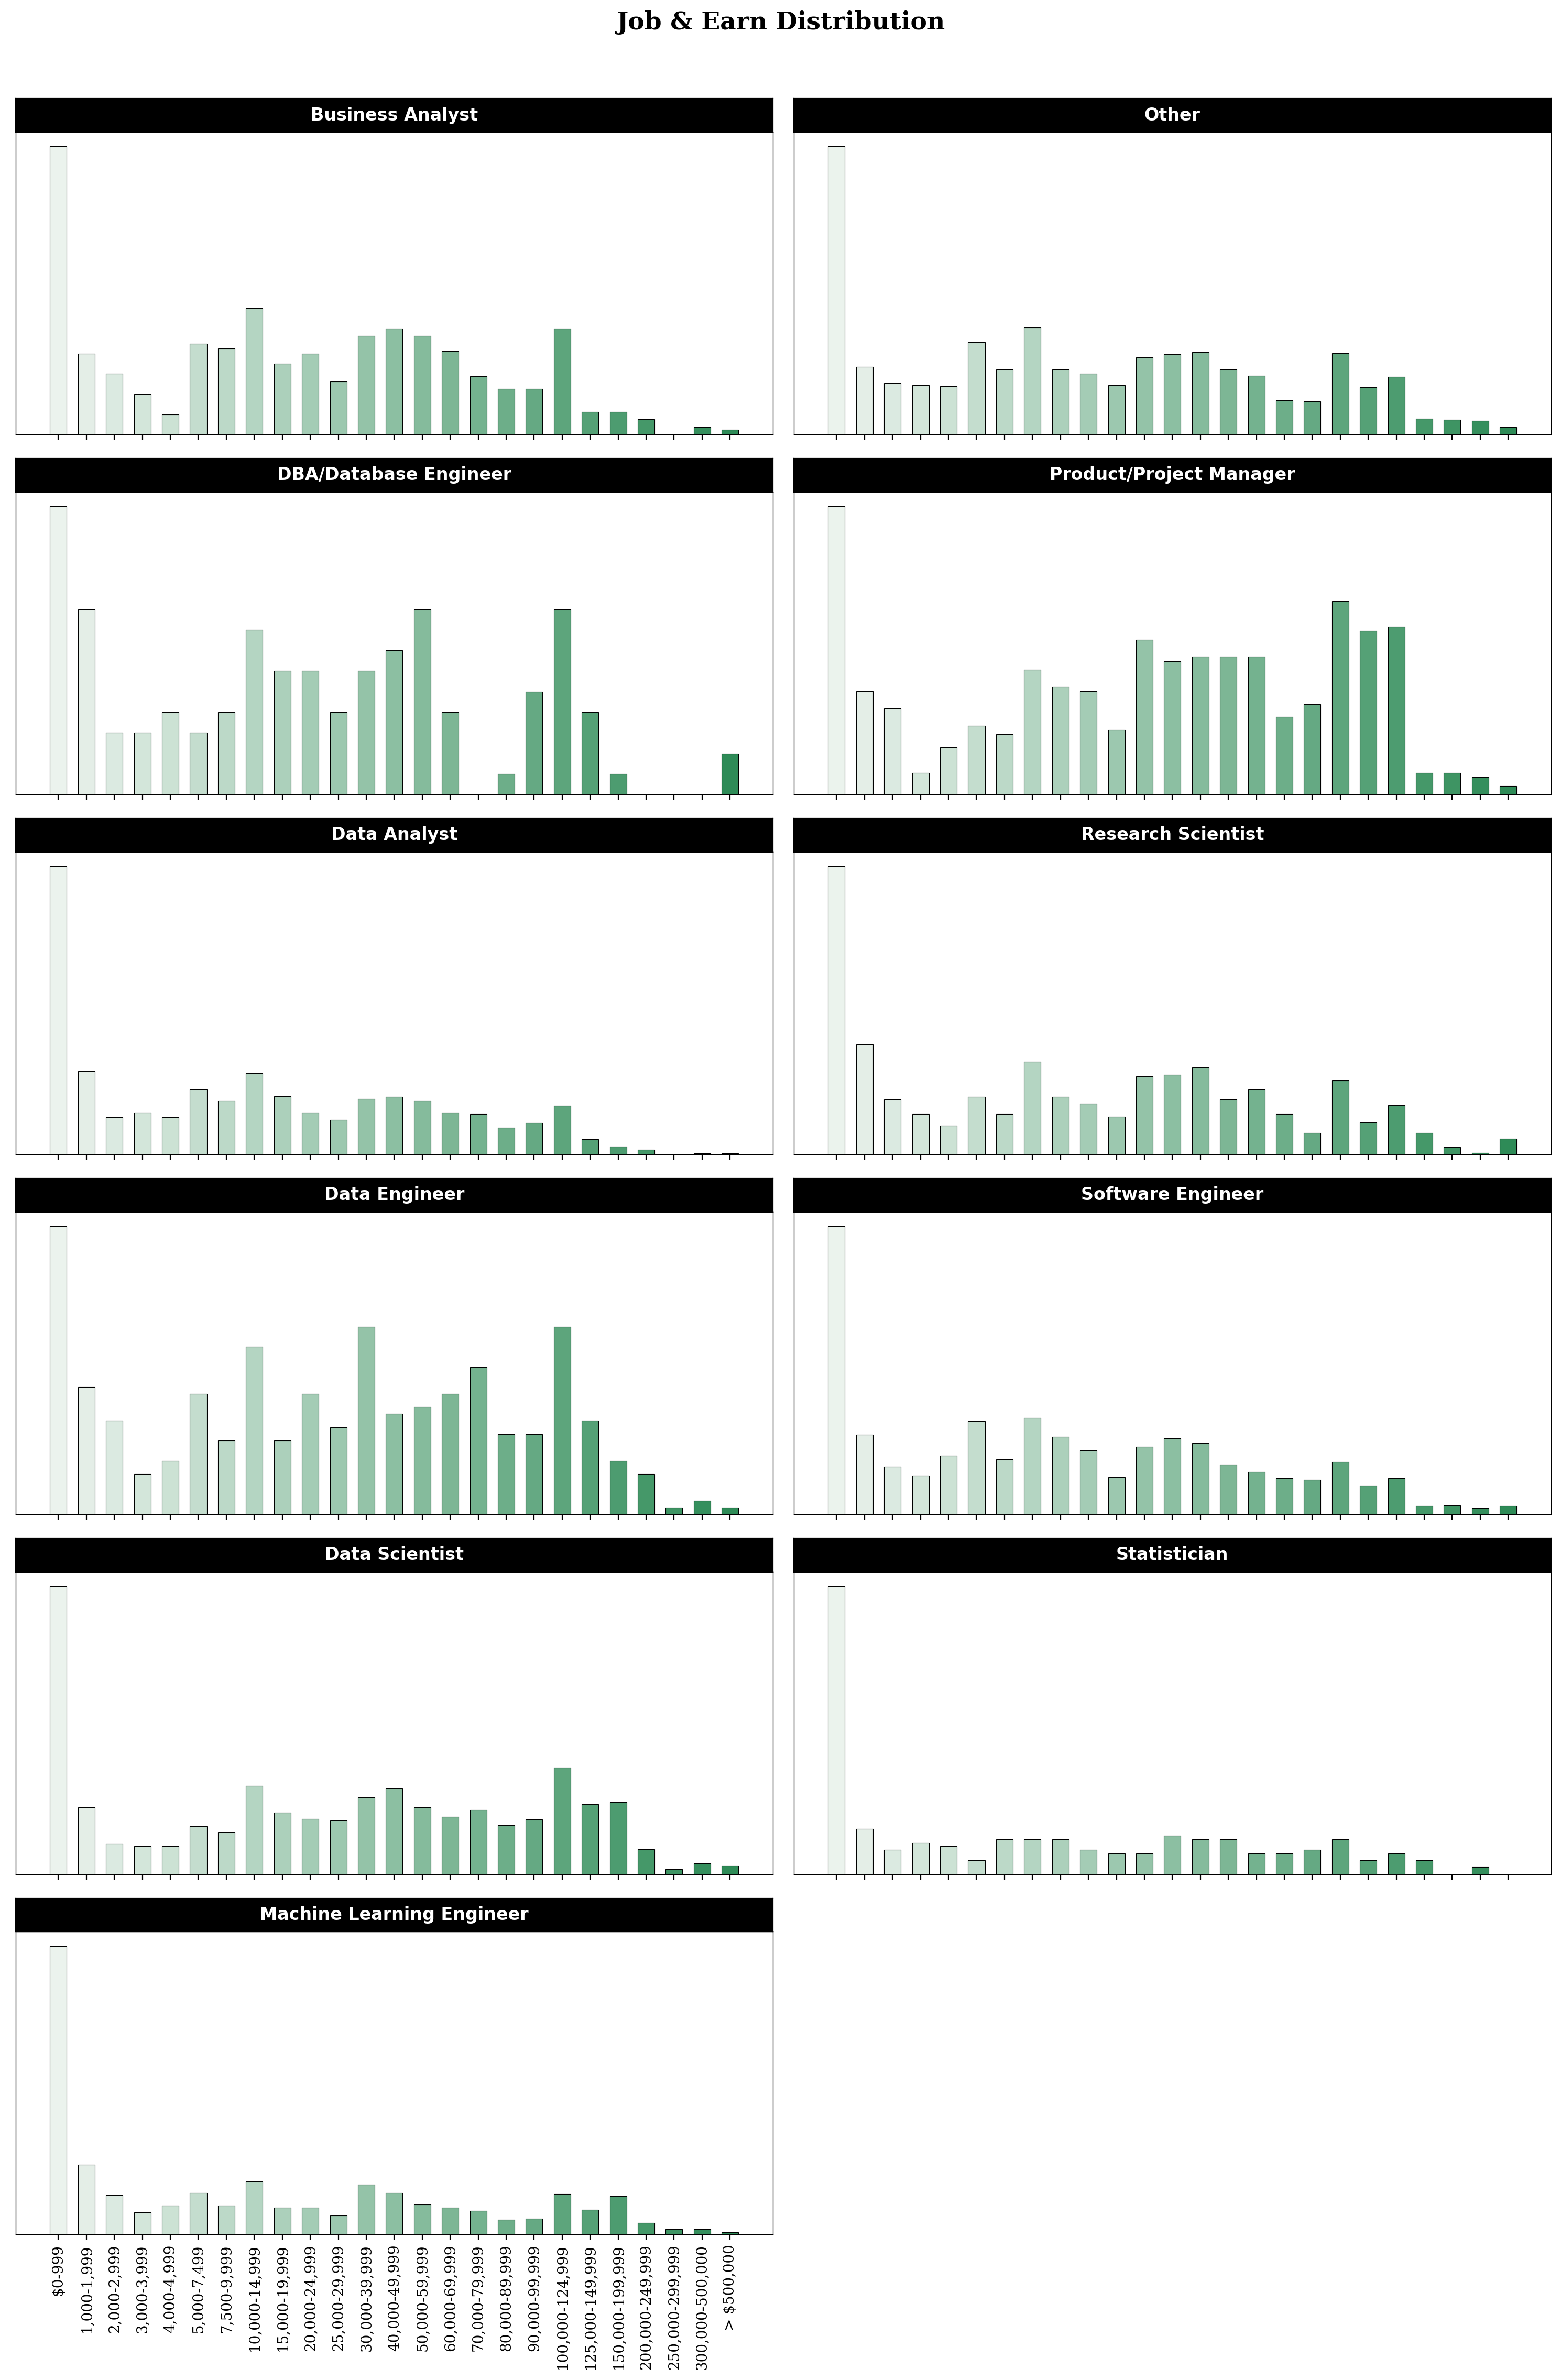

In [321]:
data_q5q24 = data.groupby("Q5")["Q24"].value_counts().unstack().fillna(0).loc[:,q24_order]
data_q5q24 = (data_q5q24.T /data_q5q24.sum(axis=1))

colors=sns.light_palette("seagreen", len(data_q24))

fig, ax = plt.subplots(6, 2,figsize=(15, 22), sharex=True)

for idx, q5_idx in enumerate(data_q5q24.columns):


    ax[idx%6][idx//6].bar(data_q5q24[q5_idx].index, data_q5q24[q5_idx], color=colors, edgecolor='black', linewidth=0.4, width=0.6)
    ax[idx%6][idx//6].set_yticks([])
    for s in ['top', 'bottom', 'left', 'right']:
        ax[idx%6][idx//6].spines[s].set_linewidth(0.5)
    
    divider = make_axes_locatable(ax[idx%6][idx//6])
    cax = divider.append_axes("top", size="11%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(q5_idx, loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=12, color='white', weight='bold'))
    cax.add_artist(at)
    
ax[-1][0].set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax[-1][1].set_xticklabels(q24_order, fontfamily='serif', rotation=90)

ax[-1][-1].set_visible(False)

fig.suptitle('Job & Earn Distribution', fontsize=17, fontweight='bold', fontfamily='serif', y=1.03)

plt.tight_layout()
# plt.subplots_adjust(hspace=0.25)
plt.show()

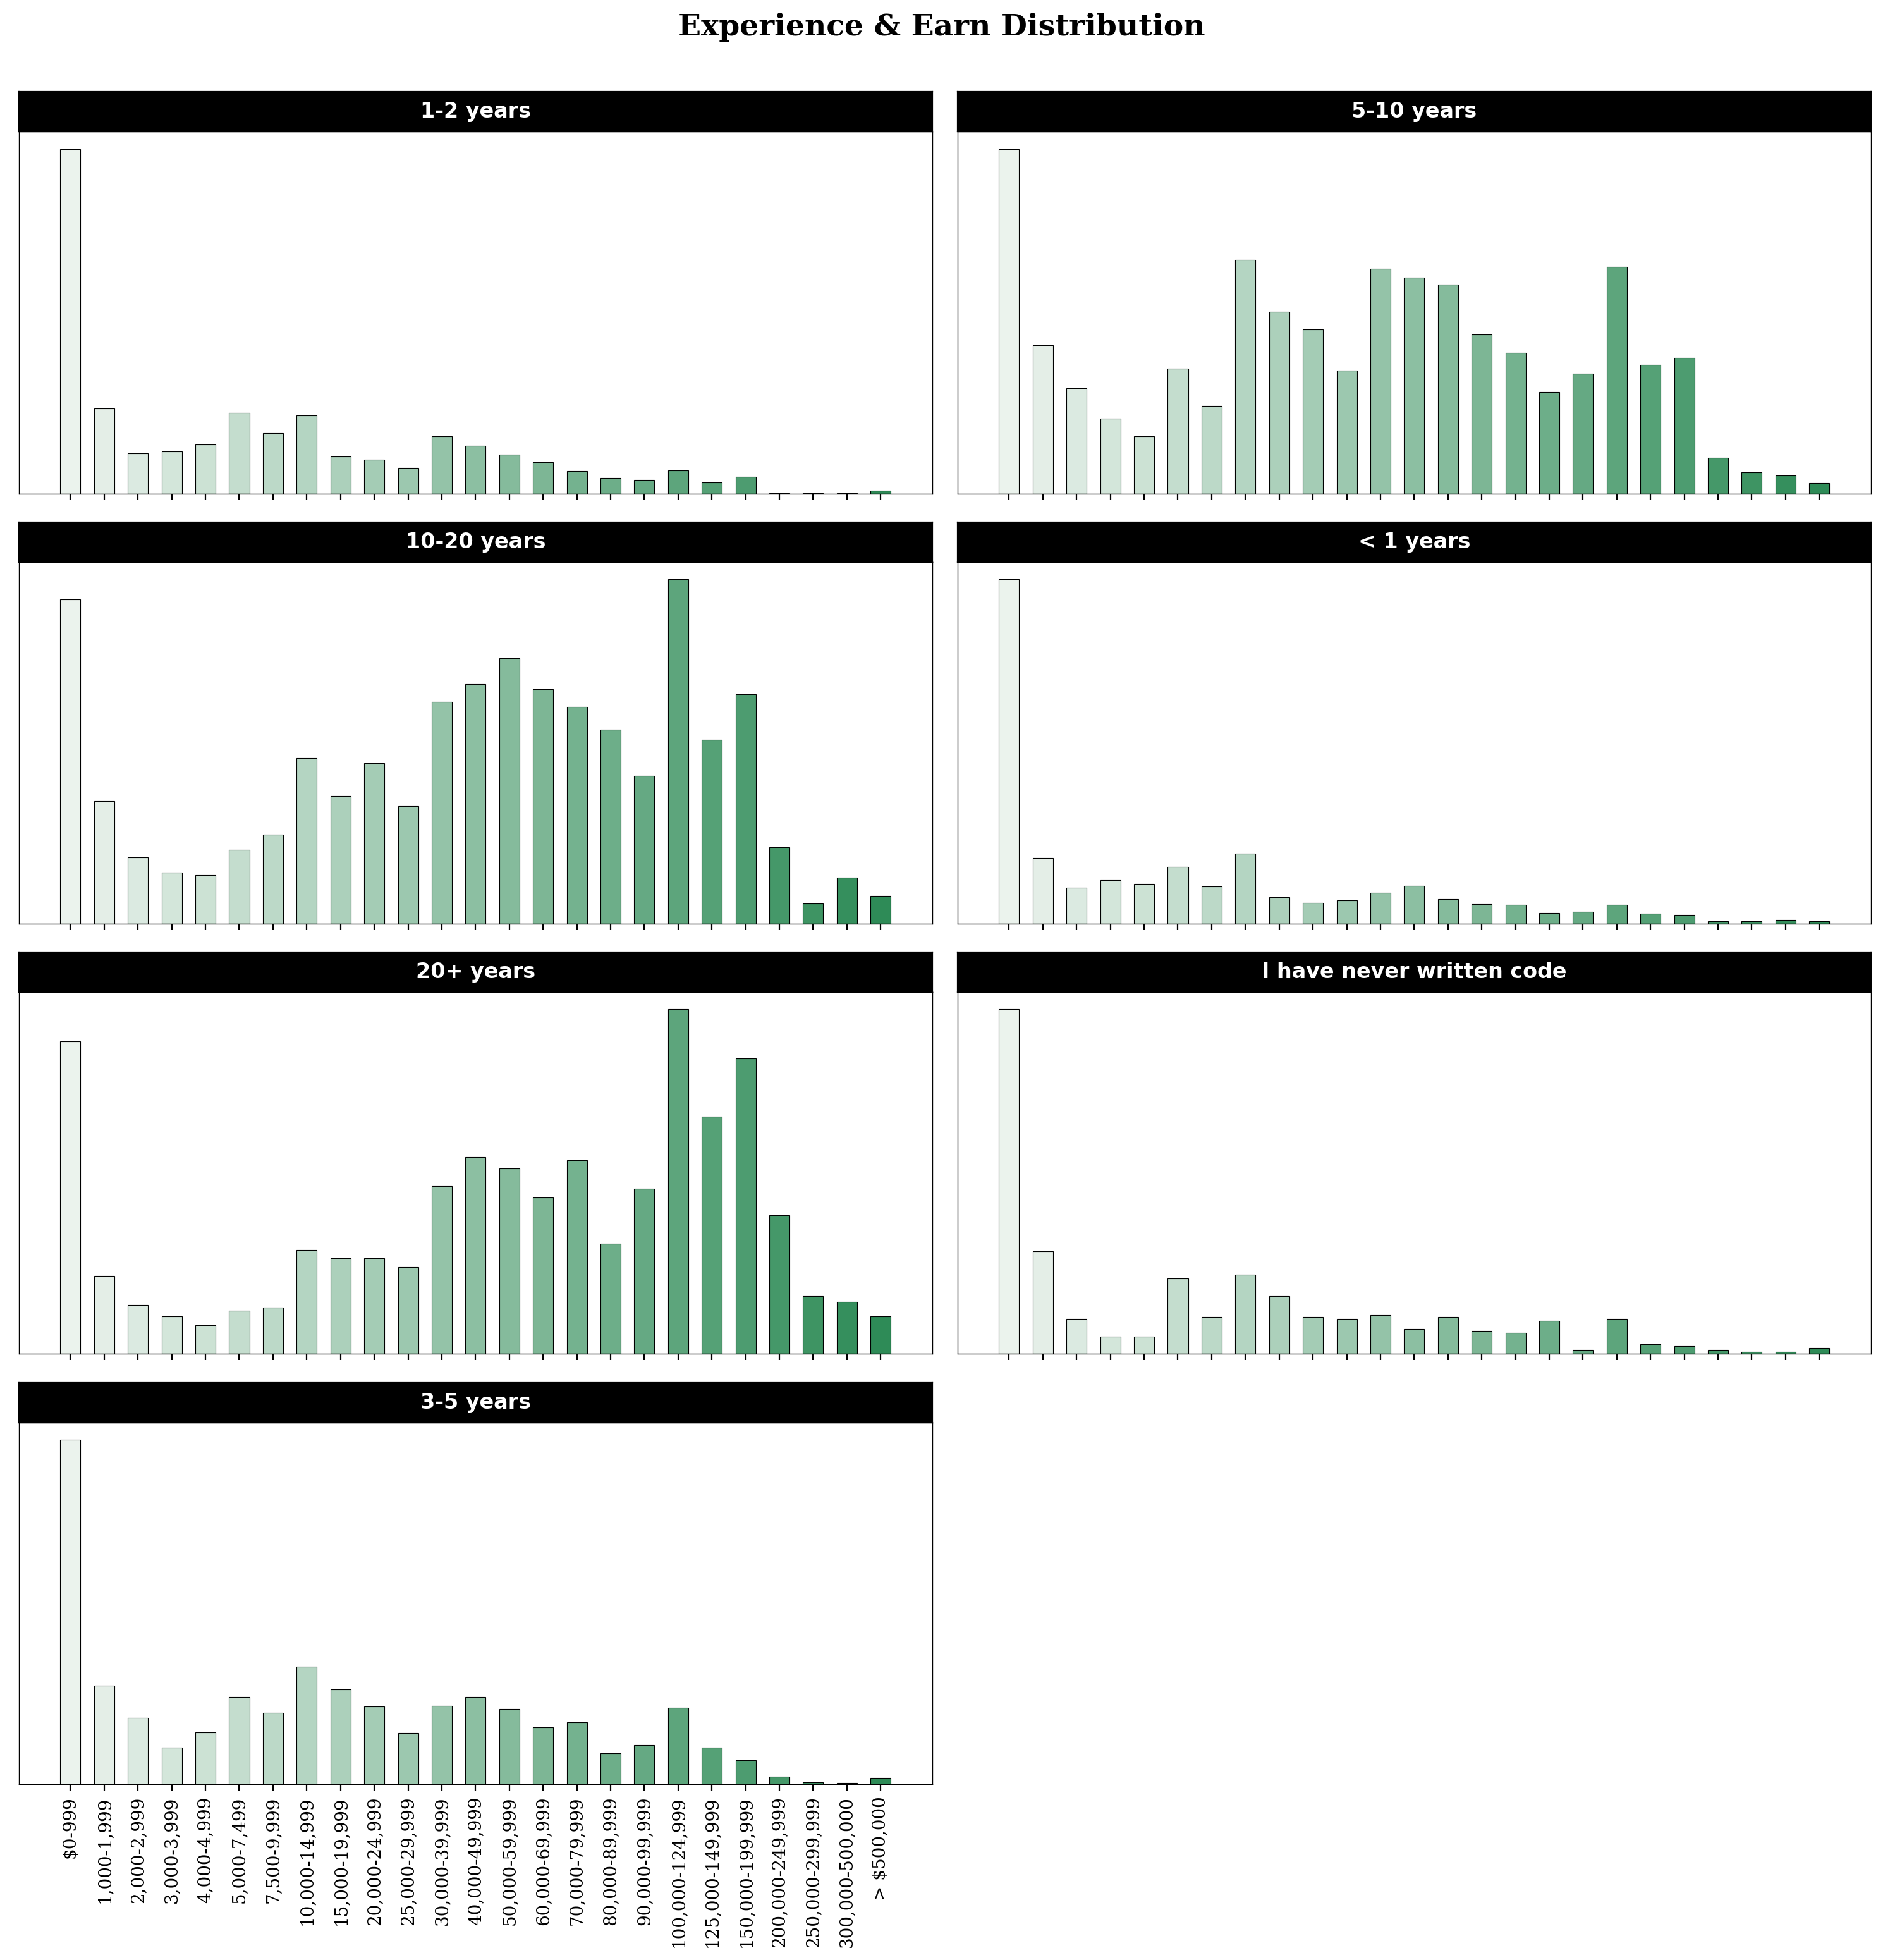

In [323]:
data_q6q24 = data.groupby("Q6")["Q24"].value_counts().unstack().loc[:,q24_order]
data_q6q24 = (data_q6q24.T /data_q6q24.sum(axis=1))#.rename(columns={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})

fig, ax = plt.subplots(4, 2,figsize=(15, 15), sharex=True)

for idx, q6_idx in enumerate(data_q6q24.columns):


    ax[idx%4][idx//4].bar(data_q6q24[q6_idx].index, data_q6q24[q6_idx], color=colors, edgecolor='black', linewidth=0.4, width=0.6)
    ax[idx%4][idx//4].set_yticks([])
    for s in ['top', 'bottom', 'left', 'right']:
        ax[idx%4][idx//4].spines[s].set_linewidth(0.5)
    
    divider = make_axes_locatable(ax[idx%4][idx//4])
    cax = divider.append_axes("top", size="11%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(q6_idx, loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=12, color='white', weight='bold'))
    cax.add_artist(at)
    
ax[-1][0].set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax[-1][1].set_xticklabels(q24_order, fontfamily='serif', rotation=90)
ax[-1][-1].set_visible(False)

fig.suptitle('Experience & Earn Distribution', fontsize=17, fontweight='bold', fontfamily='serif', y=1.03)

plt.tight_layout()
# plt.subplots_adjust(hspace=0.25)
plt.show()